# **Predicting Mushrooms - to eat or not to eat**


# Introduction
This analysis seeks to understand whether physical characteristics, namely the anatomy of the mushroom, as well as other features can be an indication of whether the particular mushroom is edible or poisonous. Throughout the analysis, the colour, red, will indicate a poisonous mushroom, whereas the colour, green, will indicate an edible mushroom.

The structure follows the typical steps of initially analysing the data exploratorily, followed by the step of processing- and cleaning the data. Lastly, the data has been analysed by way of unsupervised machine learning and supervised machine learning utilizing appropriate algorithms for predictive tasks.

# Group members
Benjamin Ly

Camilla Dyg Hannesbo

Laura Veng Larsen

Tobias Moesgård Jensen

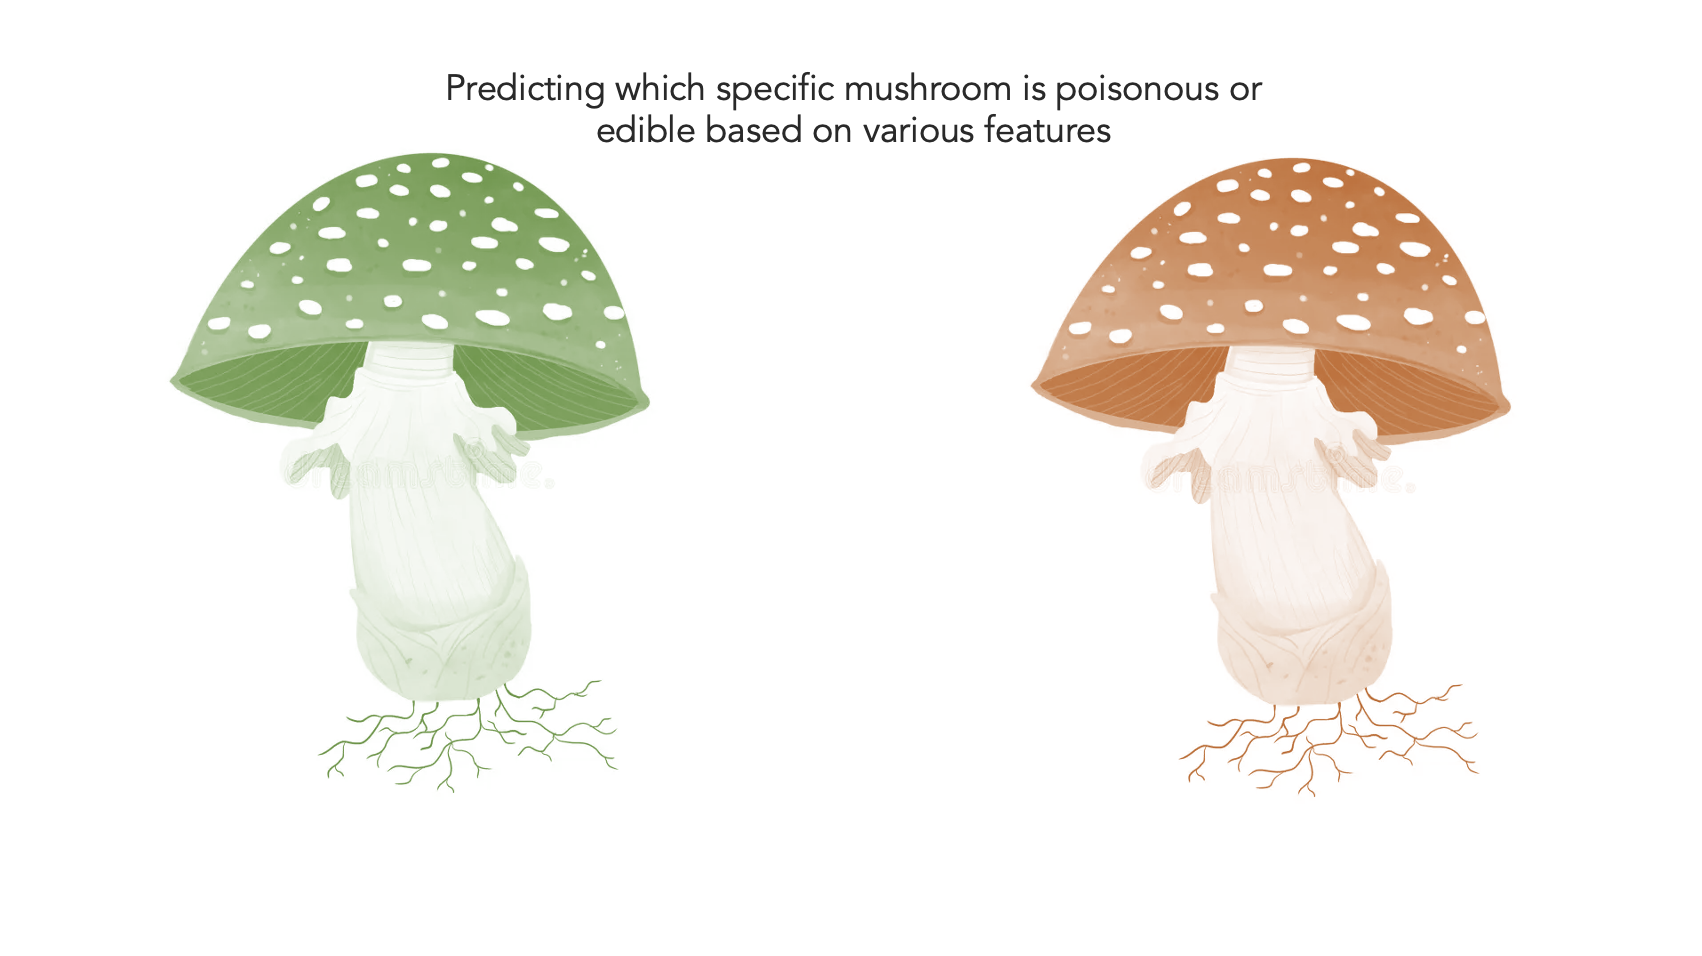

## Importing modules and loading in the data

In [1]:
# At first we will install the python packages we are using in this notebook.
# We make the --q commant after the name of the libraries since we would like to make the installation quiet.
# Afterwards we will import all the necessary libraries as well.

!pip install xgboost --q
!pip install sklearn --q
!pip install shap --q
!pip install gradio --q

^C


In [2]:
# Import the necessary libraries

# Basic libraries for data manipulation, numerical operations, visualization ect.
import pandas as pd # Import the pandas library for data manipulation and analysis
import numpy as np # Import the numpy library for numerical operations
import seaborn as sns # Import the seaborn library for data visualization based on Matplotlib
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib for creating static plots

# For controlling warnings in the code
import warnings
from sklearn.exceptions import ConvergenceWarning

# To encode our categorical values for UML as well as KMeans for Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# To encode our categorical values for SML
from sklearn.preprocessing import LabelEncoder

# Building our prediction model
from sklearn.model_selection import train_test_split # For splitting data into train and test sets

# Fitting an testing the classifier models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# For calculating the score and model accuracy/-precision
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

# Importing the necessary libaries for the hyperparameter tuning part
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer # For creating a custom scoring function
from sklearn.metrics import accuracy_score # To evaluate the model's performance.

# Importing the shap libary for testing the model
import shap

# Importing the necessary imports for creating pipelines
from sklearn.pipeline import Pipeline # To create a pipeline that combines multiple steps.
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Import necessary libraries as gradio for making a prediction app
import gradio as gr

# Import necessary libraries as pickle for saving the outputfiles for a app.py interface app
import pickle

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [3]:
# We will call the below code to ignore all selected warnings in the code for getting more clearn outputs
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
# Import the dataset.

# Define the filepath of the dataset
filepath = "mushrooms_dataset.csv"

# Use Pandas to read the dataset into a DataFrame
df = pd.read_csv(filepath)

# EDA - Exploratory Data Analysis
The below figures are meant to create a visual overview of the features.


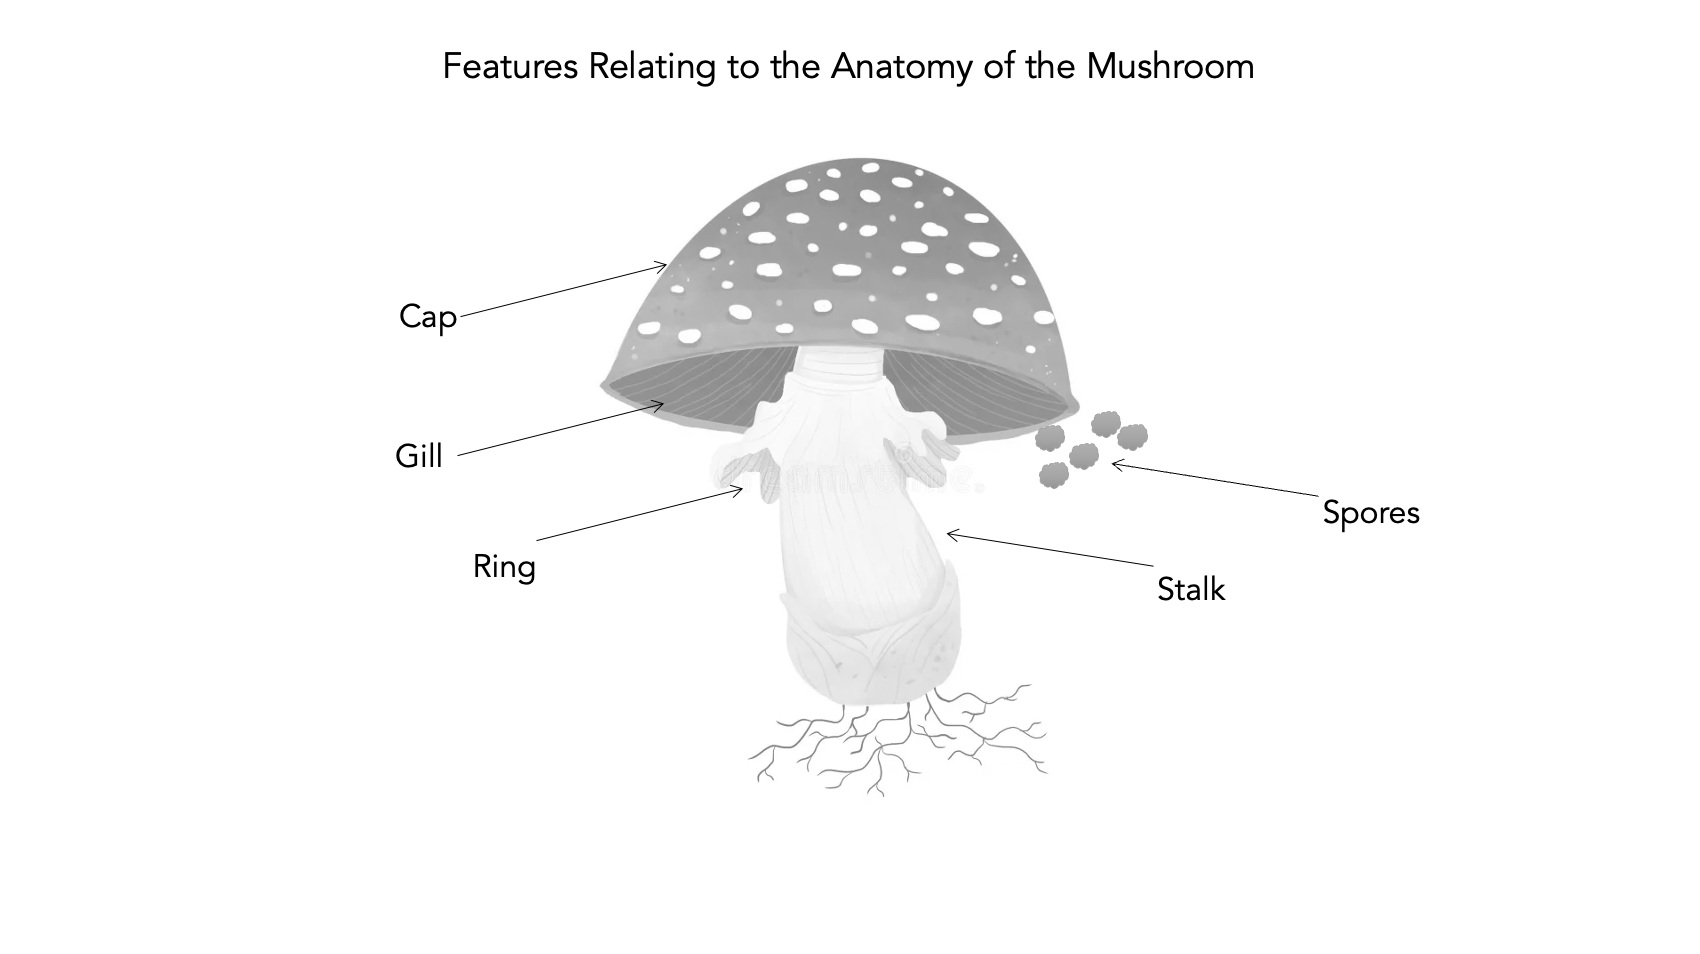 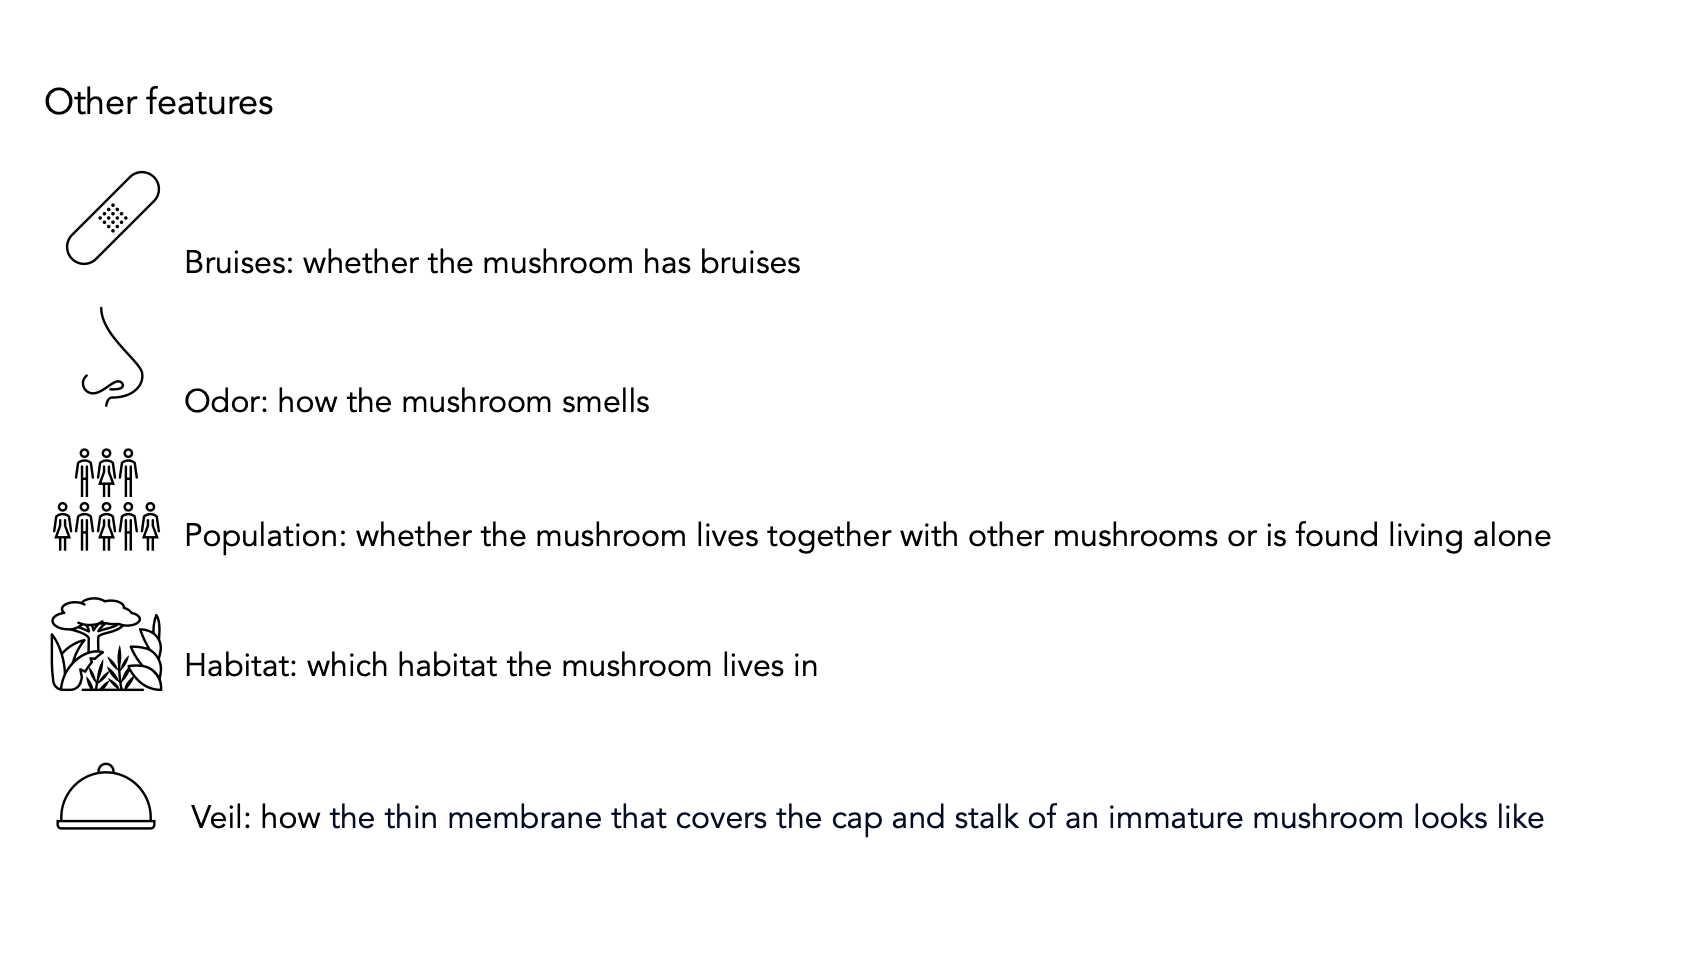

In [5]:
# Display the first five rows of the dataset to understand its structure
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
# Understand the dataset by seing the column type and list all the column names
# There are 8124 rows and 23 columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
# As we can see in the above code there isnt any missing values (initially).
# We can also use isnull().sum() to check for missing values
print("Missing values in the dataset:")
df.isnull().sum()

Missing values in the dataset:


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
# We can also count the number of unique values in each column.
# This is especially helpful for the understanding the cardinality or diversity of data in each column.

# As we can see there is a lot of columns with only two different values which indicates that the column could
# be a boolean as the column type.
print("Number of unique values:")
df.nunique()

Number of unique values:


class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [9]:
# As we can see from the .nunique function, 'veil-type' has only one unique value which is 'p'
# Secondly we can also see there is '?' in one column 'stalk-root'.

# Additionally, we can see that the columns with only two unique values are not necessarily boolean,
# since for example column 'gill-spacing' have the values ['c' 'w'].
# Based on this argument we will just handle these values at rest of the categorical columns.

for column in df.columns:
    unique_values = df[column].unique()
    print(f"\033[1m'{column}':\033[0m{unique_values}")

'class':['p' 'e']
'cap-shape':['x' 'b' 's' 'f' 'k' 'c']
'cap-surface':['s' 'y' 'f' 'g']
'cap-color':['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
'bruises':['t' 'f']
'odor':['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
'gill-attachment':['f' 'a']
'gill-spacing':['c' 'w']
'gill-size':['n' 'b']
'gill-color':['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
'stalk-shape':['e' 't']
'stalk-root':['e' 'c' 'b' 'r' '?']
'stalk-surface-above-ring':['s' 'f' 'k' 'y']
'stalk-surface-below-ring':['s' 'f' 'y' 'k']
'stalk-color-above-ring':['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
'stalk-color-below-ring':['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
'veil-type':['p']
'veil-color':['w' 'n' 'o' 'y']
'ring-number':['o' 't' 'n']
'ring-type':['p' 'e' 'l' 'f' 'n']
'spore-print-color':['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
'population':['s' 'n' 'a' 'v' 'y' 'c']
'habitat':['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [10]:
# We saw in the readme file that there where some missing values. We therefore looked for these with
# .isnull().sum() right above but the result was that there was not any.
# Now will we try and find missing values by searching for '?'.

# In this code lambda is being used to define an unnamed function
print("Looking for any '?' values")
print(df.apply(lambda col: col.eq('?').sum()))

Looking for any '?' values
class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


In [11]:
# Lastly we will also check for duplicates on the rows on the whole dateset.
# As wee can see there is no duplicated rows therefore we will just proceed
df.duplicated().sum()

0

# Data processing

In the realm of machine learning, the adage "garbage in, garbage out" holds true with particular significance. The quality and preparation of data are paramount to the success of any machine learning model.

Within this section, we will delve into a variety of data preprocessing techniques, each designed to address specific challenges that arise during the data preparation phase. From handling missing values and outliers (if there is some) to encoding categorical variables, our objective is to create a dataset that is both suitable for our chosen machine learning algorithms and capable of revealing meaningful insights hidden within the data.

Ultimately, the Data Processing section is where we lay the foundation for the success of our machine learning project. It is the phase where raw data evolves into actionable insights, enabling us to build accurate and robust models. By the end of this section, we will have transformed our data into a format that is ready to be fed into machine learning algorithms, setting the stage for the subsequent stages of model development and evaluation.

## Data cleaning

Data cleaning is the initial step in transforming raw data into a reliable and meaningful dataset. It involves identifying and rectifying errors, inconsistencies, and anomalies that can adversely affect the integrity and trustworthiness of the data. This process is essential because machine learning algorithms are sensitive to data quality, and erroneous or noisy data can lead to misleading results and unreliable models.

Within this section, we will embark on a comprehensive journey to address common data cleaning challenges. We will explore techniques to deal with missing data, either through imputation or removal, ensuring that our dataset is complete and suitable for analysis. Additionally, we will investigate methods to detect and manage outliers, which can skew statistical measures and adversely impact model training.

In [12]:
# Let's change the values, so the variables in each column make more sense
df['class'] = df['class'].replace({'p':'poisonous','e':'edible'})
df['cap-shape'] = df['cap-shape'].replace({'b':'bell','c':'conical','x':'convex','f':'flat', 'k':'knobbed','s':'sunken'})
df['cap-surface'] = df['cap-surface'].replace({'f':'fibrous','g':'grooves','y':'scaly','s':'smooth'})
df['cap-color'] = df['cap-color'].replace({'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'})
df['bruises'] = df['bruises'].replace({'t':'bruises','f':'no'})
df['odor'] = df['odor'].replace({'a':'almond','l':'anise','c':'creosote','y':'fishy','f':'foul','m':'musty','n':'none','p':'pungent','s':'spicy'})
df['gill-attachment'] = df['gill-attachment'].replace({'a':'attached','d':'descending', 'f':'free', 'n': 'notched'})
df['gill-spacing'] = df['gill-spacing'].replace({'c':'close','w':'crowded', 'd': 'distant'})
df['gill-size'] = df['gill-spacing'].replace({'b':'broad','n':'narrow'})
df['gill-color'] = df['gill-color'].replace({'k':'black','n':'brown','b':'buff','h':'chocolate','g':'gray', 'r':'green','o':'orange','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'})
df['stalk-shape'] = df['stalk-shape'].replace({'e':'enlarging','t':'tapering'})
df['stalk-root'] = df['stalk-root'].replace({'b':'bulbous','c':'club','u':'cup','e':'equal','z':'rhizomorphs','r':'rooted', '?':'missing'})
df['stalk-surface-above-ring'] = df['stalk-surface-above-ring'].replace({'f':'fibrous','y':'scaly','k':'silky','s':'smooth'})
df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].replace({'f':'fibrous','y':'scaly','k':'silky','s':'smooth'})
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].replace({'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'})
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].replace({'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'})
df['veil-type'] = df['veil-type'].replace({'p':'partial','u':'universal'})
df['veil-color'] = df['veil-color'].replace({'n':'brown','o':'orange','w':'white','y':'yellow'})
df['ring-number'] = df['ring-number'].replace({'n':'none','o':'one','t':'two'})
df['ring-type'] = df['ring-type'].replace({'c':'cobwebby','e':'evanescent','f':'flaring','l':'large','n':'none','p':'pendant','s':'sheathing','z':'zone'})
df['spore-print-color'] = df['spore-print-color'].replace({'k':'black','n':'brown','b':'buff','h':'chocolate','r':'green','o':'orange','u':'purple','w':'white','y':'yellow'})
df['population'] = df['population'].replace({'a':'abundant','c':'clustered','n':'numerous','s':'scattered','v':'several','y':'solitary'})
df['habitat'] = df['habitat'].replace({'g':'grasses','l':'leaves','m':'meadows','p':'paths','u':'urban','w':'waste','d':'woods'})

In [13]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,close,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,close,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,close,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,close,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,crowded,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [14]:
# We drop the colum stalk-root since 2480 missing values (= '?') is high related to the total amount of values of 8124
df = df.drop('stalk-root', axis=1)

In [15]:
# We drop the colum veil-type as well since there should be 2 attributes if this feature should effect the classification
df = df.drop('veil-type', axis=1)

In [16]:
# Since the dataset is completely categorical we will not search for any outliers.

In [17]:
# Checking if the columns are removed
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat'],
      dtype='object')

In [18]:
# Checking if the columns are removed
df.shape

(8124, 21)

## Visualization

We use barcharts to visualize the distribution of class for each attribute. Creating a cross-tabulation (crosstab) and then using it to create a stacked bar chart is a common approach when we (in this instant) want to visualize the relationship between two categorical variables.

The stacked barchart is especially helpful when we want to show the distribution of one variable within the categories of another variable.

Here the crosstab aggregates the data in a way that's suitable for creating a stacked bar chart. It counts the occurrences of each combination of values between the two categorical variables ('column' and 'class' for the example).

In [19]:
# This provides a clear picture of how many instances of each class exist within each category of the 'column' variable
pd.crosstab(df['cap-shape'], df['class'])

class,edible,poisonous
cap-shape,,
bell,404,48
conical,0,4
convex,1948,1708
flat,1596,1556
knobbed,228,600
sunken,32,0


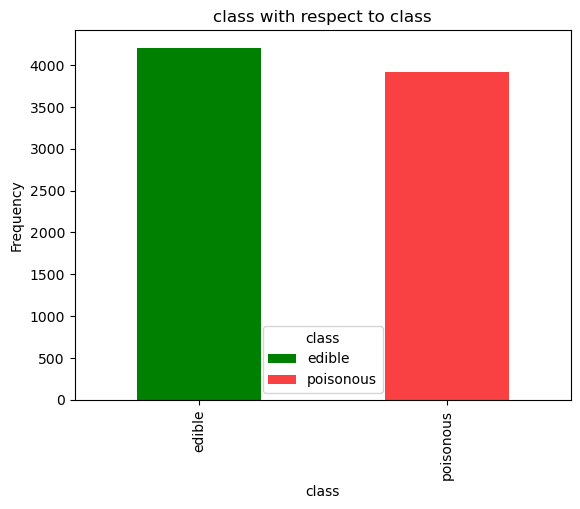

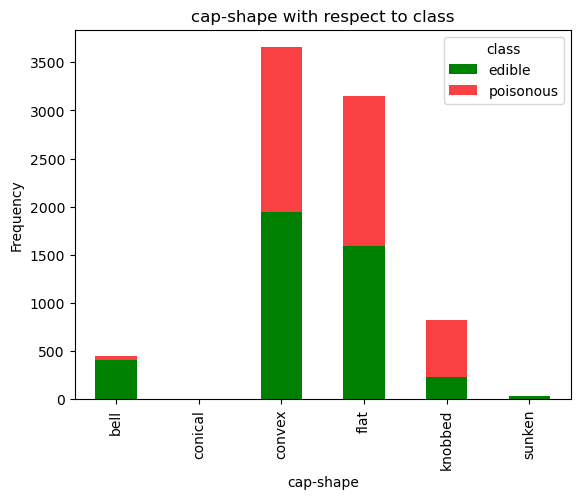

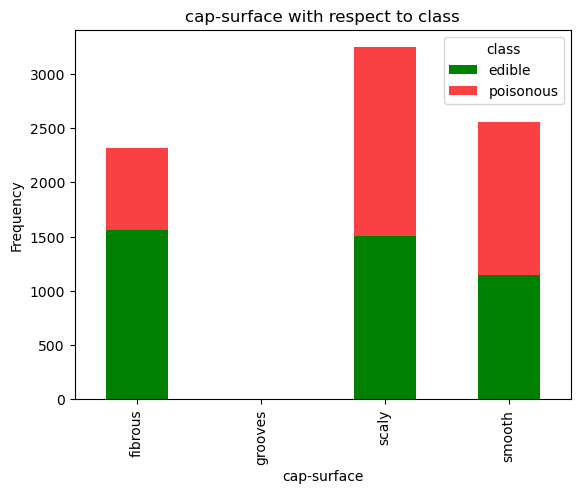

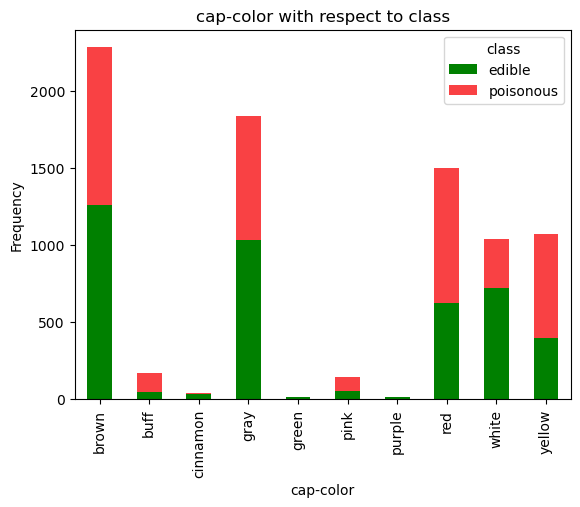

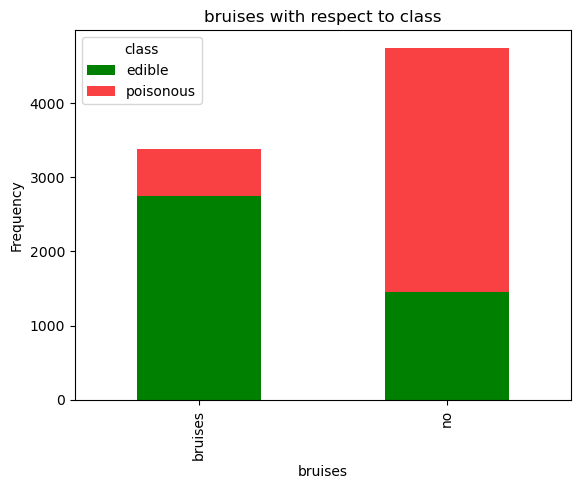

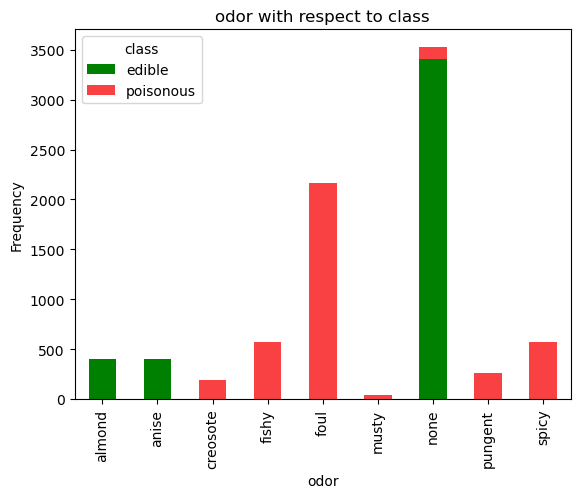

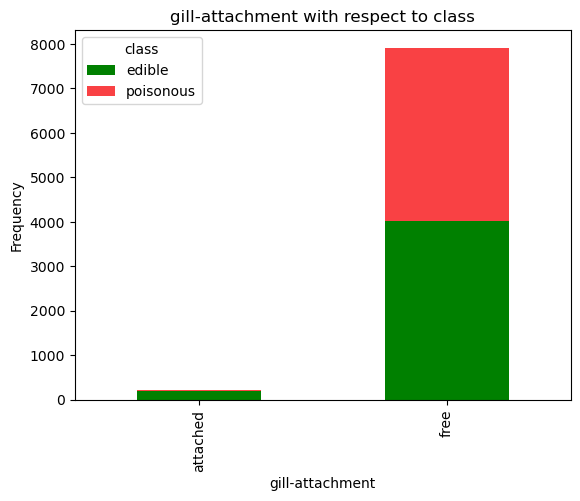

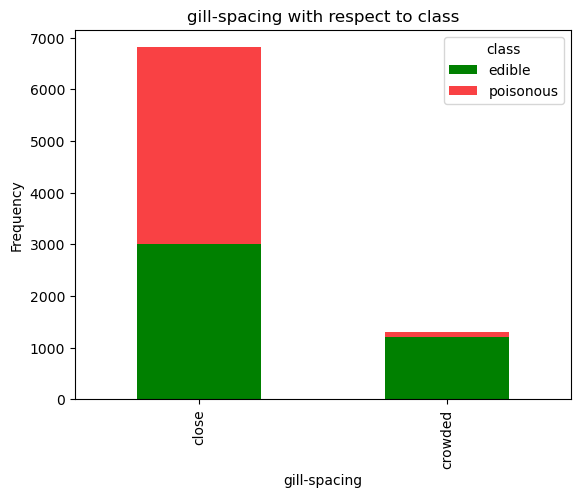

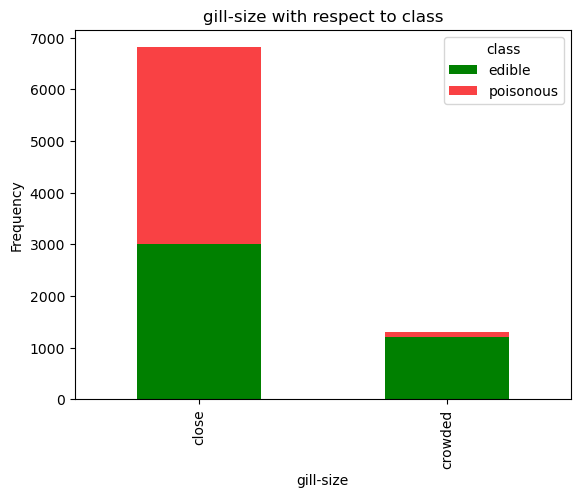

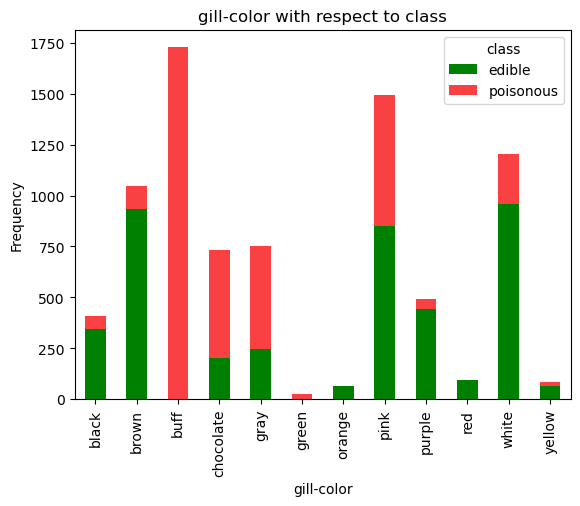

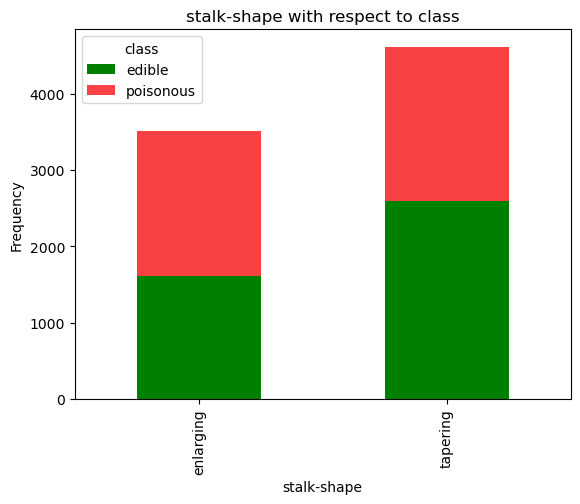

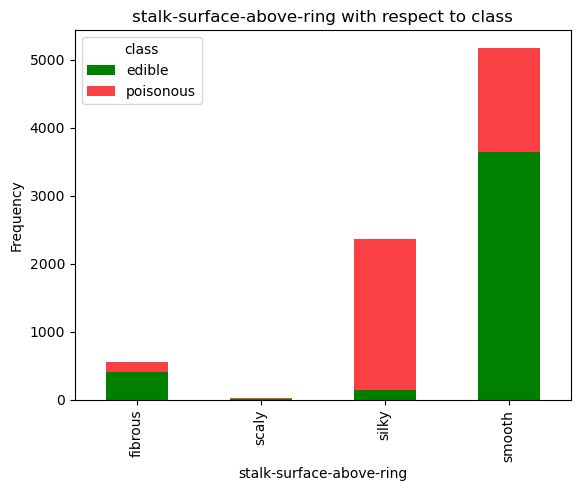

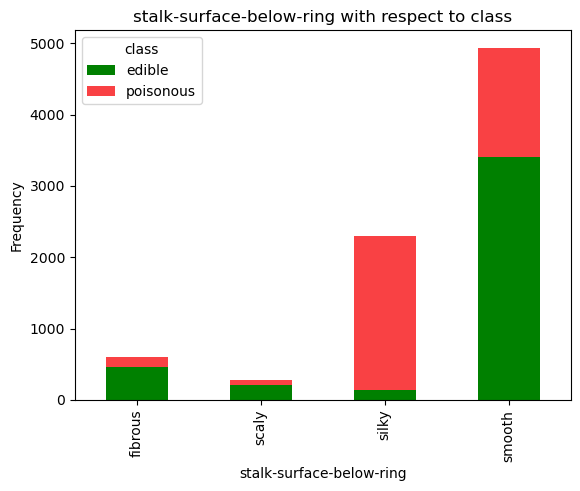

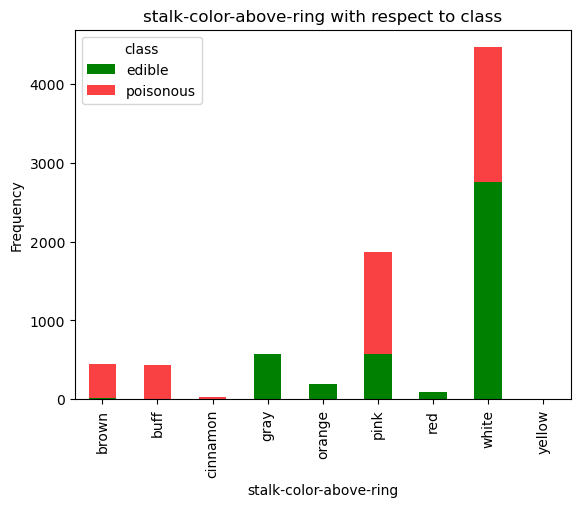

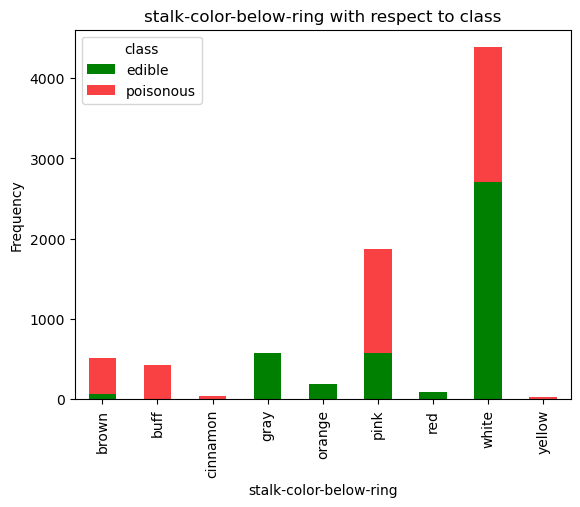

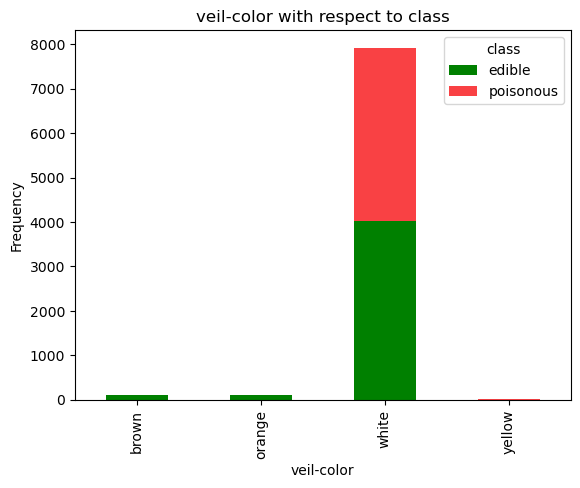

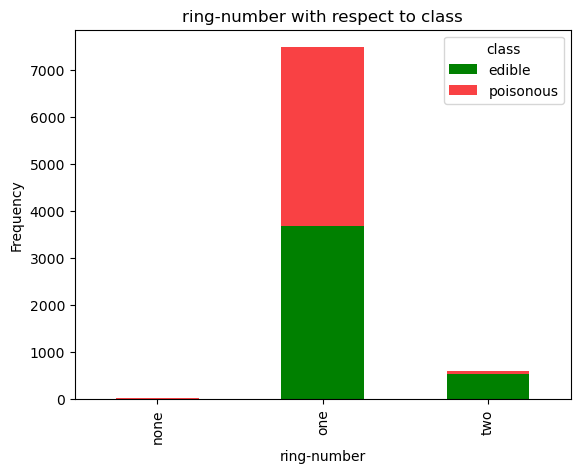

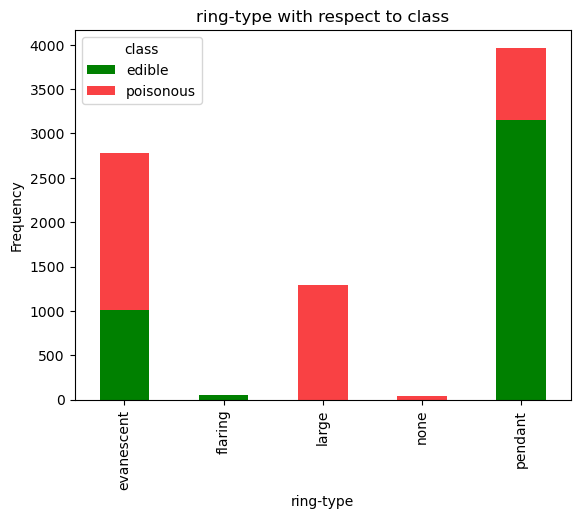

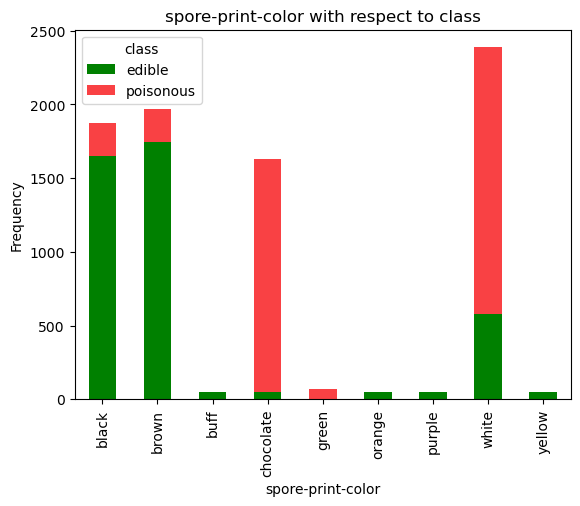

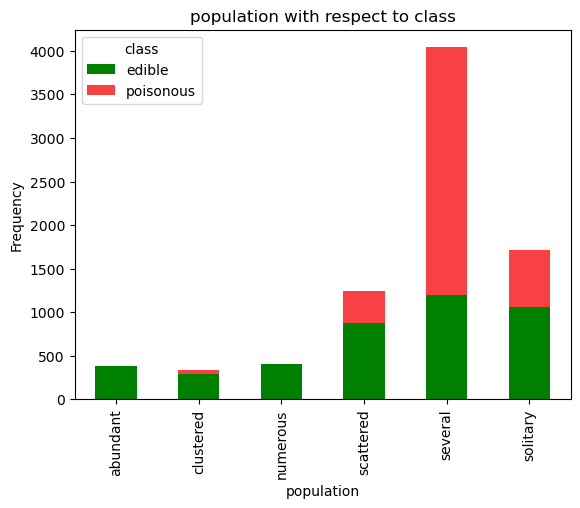

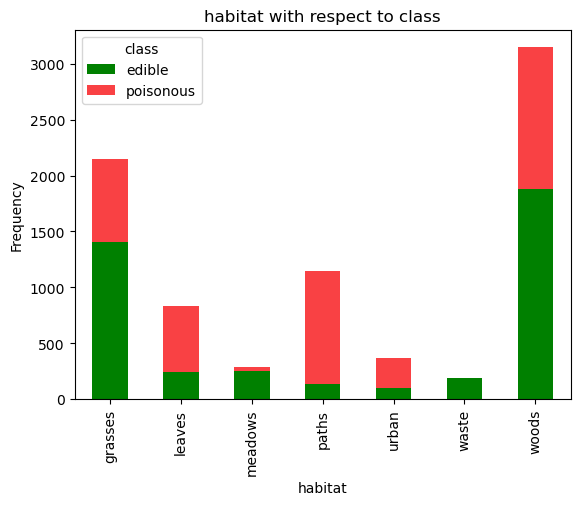

In [20]:
# At first will make a list of column names
columns = df.columns.tolist()

# Then we set the colorcode by writing the HEX colorcode
custom_colors = {'edible': '#008000', 'poisonous': '#F94144'}

# Iterate through each column
for column in columns:

    # We create a cross-tabulation (crosstab) between the current column and 'class'
    cross_tab = pd.crosstab(df[column], df['class'])

    # Create a stacked bar chart using the crosstab data
    # Use custom colors (which is defined above) for the bars based on the 'edible' and 'poisonous' classes,
    # and 'gray' as a fallback color if there's any mistake
    cross_tab.plot(kind='bar', stacked=True, color=[custom_colors.get(x, 'gray') for x in cross_tab.columns])

    # Set the title and labels of the plot
    plt.title(f'{column} with respect to class')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Display the plot
    plt.show()

**Data Intrepretation for some of the features**
*   *Class:* Fairly balanced between **poisonous** and **edible**
*   *Cap Shape:* Most of our datapoint lies within **convex** and **flat** - these are fairly distributed between **edible** and **poisonous**.
*   *Cap Surface:* Here we also se a fairly distribution between **edible** and **poisonous** on the datapoints **fibrous**, **scaly** and **smooth**.
*   *Cap Color:* Most of the datapoints lies within **brown**, **gray** and **red**, between these the distribution is fairly even if they are **edible** or **poisonous** based on cap color.
*   *Bruises:* Mushrooms displaying **bruising** are commonly more **edible** compared to **unbruised** mushrooms.
*   *Odor:* **Odorless** mushrooms are preferred. All mushrooms with **anise** or **almond** odors are edible, whereas those with **creosote**, **foul**, **musty**, **pungent**, **spicy**, or **fishy** odors are toxic.
*   *Gill Color:* Mushrooms with **buff** or **green** gill colors are consistently **poisonous**, here **buff** is our larges datapoint. Mushrooms with **black**, **brown**, **orange**, **purple**, **red** and **white** are overall more **edible**, but with some variation of few **poisonous** ones with those same gill colors.
*   *Veil Color:* Most of the datapoints has a  veil color of **white**, where these are fairly distributed between **poisonous** and **edible**.

Overall we can see from the visualizations that many of the mushroom features have datapoints where there is a distribution of both edible and poisonous mushroom inbetween. This make it hard to predict if a mushroom is either edible or poisonous just based on the visualizations.

## Feature engineering and creating target and feature

In [21]:
# Here we remove our target feature ('class') from the rest of the dataset and define as X.
X = df.iloc[:,1:]
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,convex,smooth,brown,bruises,pungent,free,close,close,black,enlarging,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,convex,smooth,yellow,bruises,almond,free,close,close,black,enlarging,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses
2,bell,smooth,white,bruises,anise,free,close,close,brown,enlarging,smooth,smooth,white,white,white,one,pendant,brown,numerous,meadows
3,convex,scaly,white,bruises,pungent,free,close,close,brown,enlarging,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
4,convex,smooth,gray,no,none,free,crowded,crowded,black,tapering,smooth,smooth,white,white,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,knobbed,smooth,brown,no,none,attached,close,close,yellow,enlarging,smooth,smooth,orange,orange,orange,one,pendant,buff,clustered,leaves
8120,convex,smooth,brown,no,none,attached,close,close,yellow,enlarging,smooth,smooth,orange,orange,brown,one,pendant,buff,several,leaves
8121,flat,smooth,brown,no,none,attached,close,close,brown,enlarging,smooth,smooth,orange,orange,orange,one,pendant,buff,clustered,leaves
8122,knobbed,scaly,brown,no,fishy,free,close,close,buff,tapering,smooth,silky,white,white,white,one,evanescent,white,several,leaves


In [22]:
# We also define y. The y-value is the value that we want to predict, our target feature class.
y = df.iloc[:,0]
y

0       poisonous
1          edible
2          edible
3       poisonous
4          edible
          ...    
8119       edible
8120       edible
8121       edible
8122    poisonous
8123       edible
Name: class, Length: 8124, dtype: object

### Encoding

**Why using a encoding technique?** <br>
Many machine learning algorithms require numerical input data. Categorical labels, such as "red," "green," and "blue," cannot be directly used as input to these algorithms. Label encoding assigns a unique numerical value to each category, making it possible to use categorical data in a numerical format. <br>

*   **Simplifies Data:**  <br> Label encoding simplifies the data by reducing the dimensionality. Instead of working with a large number of unique categories, you transform them into a smaller set of numerical values, which can be easier to manage and analyze. <br>
*   **Compatibility:** <br>
Some machine learning libraries and algorithms require input data to be in numerical form. Label encoding provides a straightforward way to prepare categorical data for these algorithms.<br>
*   **Ordinal Encoding:** <br>
Label encoding can be useful when there is an inherent ordinal relationship between the categories. For example, "low," "medium," and "high" can be encoded as 0, 1, and 2, respectively, indicating the order of magnitude. <br>
*   **Memory Efficiency:** <br>
Numerical values are generally more memory-efficient than storing text labels, which can be especially important when dealing with large datasets.



There are several encoder techniques used in machine learning to handle categorical data. The choice of encoder depends on the nature of the data, the machine learning algorithm being used, and the specific problem you are trying to solve. Here we describe some common categorical encoding techniques and highlight the differences between them:

*Label Encoding:*
This method converts the features into integers. However, if these integers are treated as numerical values, they might inadvertently imply a hierarchical order among categories. Therefore, it is not ideal for nominal (unordered) categorical data. For example, applying LabelEncoder to colors like Blue, Green, and Orange would result in values 0, 1, and 2, respectively. This numeric representation could be misinterpreted as Orange being 'better' than Blue and Green, which is not our intended interpretation. LabelEncoder is commonly used for encoding text strings, which can be used as indexes in a DataFrame or a list and later inverted back to text

*One-Hot Encoding:*
One-hot encoding represents each category as a binary vector, where each category corresponds to a single 1 in the vector and all others are 0. This means that if an observation falls within a particular category, it is marked with a '1', while for categories it doesn't belong to, it receives a '0'.
It is suitable for nominal categorical data without any ordinal relationship.
One-hot encoding preserves the distinctiveness of each category but can result in high-dimensional data, especially if there are many categories.
It can lead to the "curse of dimensionality" if used with high cardinality categorical features.

In this assigment we will use label encoding (LabelEncoder from sklearn) as our encoder techniques for SML and for UML we are using OneHotEncoer.

#### OneHotEncoder for UML purposes

As mentioned above, we'll have to encode our data. Because all our features are categorical and lack a hierarchical order we have two encoding techniques as mentioned above.

In this section, where we are using OneHotEncoder, we set Sparse to False because we want to return a numpy array instead of a sparse matrix. The reason being that PCA reqeuires a dense matrix, even though Sparse matrices are more efficient in terms of memory usage.


In [23]:
# First of all One Hot Encoder is initialized
# This will create a lot of new columns matching the number of unique categories within our data.
# Here we will set Sparse=False since we want a numpy array instead of a sparse matrix because PCA reqeuires a dense
# matrix, even though Sparse matrices are more efficient in terms of memory usage.

ohe = OneHotEncoder(sparse=False)
df_ohe_encoded = ohe.fit_transform(df)

In [24]:
# We will check the shape of the encoded data.
# We can see that the array contains 113 columns and 8.124 records
df_ohe_encoded.shape

(8124, 113)

#### LabelEncoder for SML purposes

In [25]:
# At first we initialize the LabelEncoder as set it equal to the varible 'labelencoder_X'
labelencoder_X = LabelEncoder()

# Loop through each column in the DataFrame X
for column in X.columns:

    # Check if the data type of the column is 'object' (categorical)
    if X[column].dtype == 'object':

        # Use the LabelEncoder to transform the values in the column
        X[column] = labelencoder_X.fit_transform(df[column])

In [26]:
# Here we can see the encoded values in the X-dataframe
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,3,0,0,7,1,0,0,0,0,3,3,7,7,2,1,4,0,3,4
1,2,3,9,0,0,1,0,0,0,0,3,3,7,7,2,1,4,1,2,0
2,0,3,8,0,1,1,0,0,1,0,3,3,7,7,2,1,4,1,2,2
3,2,2,8,0,7,1,0,0,1,0,3,3,7,7,2,1,4,0,3,4
4,2,3,3,1,6,1,1,1,0,1,3,3,7,7,2,1,0,1,0,0


In [27]:
# To see the the labelencoding for all values, we will make the below loop for going though all the
# original values vs the encoded values

# Here we print the categories/columns in each feature X
column_list = X.columns.values.tolist()

# This is a loop which will loop through each column name in the list 'column_list'.
# 'column_list' is defined above as the column names therefore a list of all features
for column_name in column_list:

    # Print the column name with bold formatting
    print(f'\033[1m{column_name}\033[0m')

    # Print the unique values in the original 'column_name'
    print(df[column_name].unique())

    # Convert the unique values in the X['column_name'] to a list of strings
    print(list(map(str,X[column_name].unique())))

    # Make a new line be printing a newline character for better separation of column outputs
    print('\n')

cap-shape
['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical']
['2', '0', '5', '3', '4', '1']


cap-surface
['smooth' 'scaly' 'fibrous' 'grooves']
['3', '2', '0', '1']


cap-color
['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green']
['0', '9', '8', '3', '7', '5', '1', '6', '2', '4']


bruises
['bruises' 'no']
['0', '1']


odor
['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty']
['7', '0', '1', '6', '4', '2', '3', '8', '5']


gill-attachment
['free' 'attached']
['1', '0']


gill-spacing
['close' 'crowded']
['0', '1']


gill-size
['close' 'crowded']
['0', '1']


gill-color
['black' 'brown' 'gray' 'pink' 'white' 'chocolate' 'purple' 'red' 'buff'
 'green' 'yellow' 'orange']
['0', '1', '4', '7', '10', '3', '8', '9', '2', '5', '11', '6']


stalk-shape
['enlarging' 'tapering']
['0', '1']


stalk-surface-above-ring
['smooth' 'fibrous' 'silky' 'scaly']
['3', '0', '2', '1']


stalk-surface-below-ring
['smooth' 'fibrous' 'scaly' 'silky']
[

In [28]:
# Now we will encode our y-value (predicted value) using the same encoder techniques as previously
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [29]:
# To find the original names and their corresponding encoded values:
original_names = labelencoder_y.classes_
encoded_values = labelencoder_y.transform(original_names)

# Print the original names and their encoded values
for original, encoded in zip(original_names, encoded_values):
    print(f"Original class: {original}, Encoded Value: {encoded}")

Original class: edible, Encoded Value: 0
Original class: poisonous, Encoded Value: 1


# UML: PCA and Clustering

**Coding, Dimensionality reduction and Clustering**

The following sections we will perform Unsupervised Machine Learning (UML) techniques to gain insight into our data. We will see if we can find any patterns in the data. For this purpose, we will use the following UML techniques:

*   All our data is categorical, without hierarchical order. Therefore we encode the data using OneHotEncoder. (See section "OneHotEncoder for UML purposes")
*   Based on the encoded data, we will reduce the dimensionality of the data using Principal Component Analysis (PCA)
*   After the dimensionality reduction we are clustering the data based on K-Means clustering to see if we can find any patterns in the data

## PCA and dimension reduction

Given that we are dealing with 113 columns, gaining a comprehensive understanding of the data and visualizing it becomes challenging. Therefore, we will employ Principal Component Analysis (PCA) to reduce the dimensionality of the data. PCA allows us to condense the data into a specified number of dimensions or components.

PCA is a technique designed for dimensionality reduction in datasets. It accomplishes this by constructing new features, which are linear combinations of the original features. These newly derived features are referred to as principal components and are organized in order of the variance they account for in the dataset. The first principal component captures the most variance, followed by the second principal component, and so forth

As we could see in the encoding section of this notebook there is 113 different coloumns. First we can see the fact that 113 components is capturing all the information of the dataset, as can be seen from the explained variance ratio.

In [30]:
# Conducting the PCA model and fit_transform it to the df_encoded (OneHotEncoded data = features)
n_components = 113

pca = PCA(n_components=n_components)
df_encoded_pca = pca.fit_transform(df_ohe_encoded)

In [31]:
# Visualize the explained variance for each principal component.
# By keeping all of the components we still have 100 % of the variation within our data
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance.sum().round(2)*100)

Explained Variance Ratios: 100.0


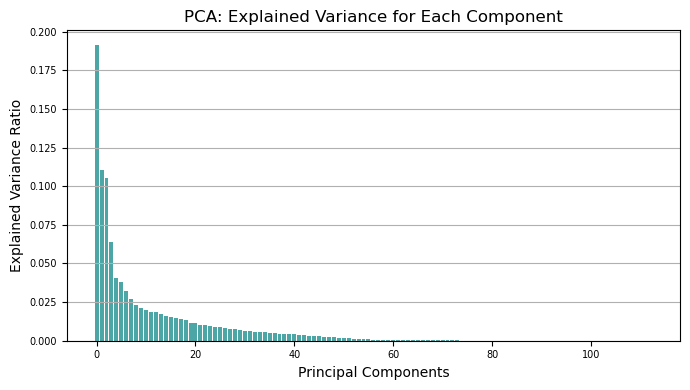

In [32]:
# Visualizing explained variance

# Extract the explained variance ratios for each principal component
explained_variance = pca.explained_variance_ratio_

# Create a figure for the plot with specific dimensions
plt.figure(figsize=(7,4))

# Create a bar plot to visualize the explained variance for each component
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.7, align='center', color='teal')

# Add labels and title to the plot
plt.ylabel('Explained Variance Ratio', fontsize=10)
plt.xlabel('Principal Components', fontsize=10)
plt.title('PCA: Explained Variance for Each Component', fontsize=12)

# Set font sizes for x and y tick labels
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Ensure a tight layout for optimal spacing and adding grid lines along the y-axis for better readability
plt.tight_layout()
plt.grid(axis='y')

# Display the plot
plt.show()

As observed in the chart depicting individual components, there is a rapid decrease in the explained variance ratio. After reaching 10 components, each additional component contributes less than 2.5% to the explained variance ratio. However, it's worth noting that the first two components collectively account for approximately 30% of the overall variation. While this may not be a substantial amount, we will still utilize them for visualization purposes.

To further emphasize this insight highlighted in the chart, the following loop will calculate and display the cumulative explained variance for an increasing number of components, up to a maximum of 15 components.

In [33]:
# This for-loop will print the cumulative explained
# variance ratio for an increasing number of components from 1 to 15 components.
for i in range(1, 16):

    # Initialize PCA with 'i' components.
    pca = PCA(n_components=i)

    # Fit and transform the input dataset 'df_encoded' using PCA.
    df_encoded_pca = pca.fit_transform(df_ohe_encoded)

    # Calculate the cumulative explained variance ratio for the 'i' components.
    percentage = pca.explained_variance_ratio_.sum() * 100

    # Format the cumulative explained variance ratio to two decimal places.
    formatted_percentage = "{:.2f}%".format(percentage)

    # Print the cumulative explained variance ratio for 'i' components.
    print(f"{formatted_percentage} is explained by {i} components")

19.14% is explained by 1 components
30.16% is explained by 2 components
40.71% is explained by 3 components
47.13% is explained by 4 components
51.17% is explained by 5 components
54.94% is explained by 6 components
58.18% is explained by 7 components
60.86% is explained by 8 components
63.15% is explained by 9 components
65.28% is explained by 10 components
67.25% is explained by 11 components
69.13% is explained by 12 components
70.97% is explained by 13 components
72.67% is explained by 14 components
74.25% is explained by 15 components


In [34]:
# This for-loop will print the incremental explained
# variance ratio for an increasing number of components from 1 to 15 components.
previous_percentage = 0  # Initialize the previous percentage as 0

for i in range(1, 16):

    # Initialize PCA with 'i' components.
    pca = PCA(n_components=i)

    # Fit and transform the input dataset 'df_encoded' using PCA.
    df_encoded_pca = pca.fit_transform(df_ohe_encoded)

    # Calculate the cumulative explained variance ratio for the 'i' components.
    percentage = pca.explained_variance_ratio_.sum() * 100

    # Calculate the incremental explained variance compared to the previous component.
    incremental_percentage = percentage - previous_percentage

    # Format the incremental explained variance to two decimal places.
    formatted_incremental_percentage = "{:.2f}%".format(incremental_percentage)

    # Print the incremental explained variance for 'i' components.
    print(f"Explained variance added by {i} components: {formatted_incremental_percentage}")

    # Update the previous percentage for the next iteration.
    previous_percentage = percentage

Explained variance added by 1 components: 19.14%
Explained variance added by 2 components: 11.02%
Explained variance added by 3 components: 10.55%
Explained variance added by 4 components: 6.42%
Explained variance added by 5 components: 4.04%
Explained variance added by 6 components: 3.77%
Explained variance added by 7 components: 3.23%
Explained variance added by 8 components: 2.69%
Explained variance added by 9 components: 2.29%
Explained variance added by 10 components: 2.13%
Explained variance added by 11 components: 1.97%
Explained variance added by 12 components: 1.88%
Explained variance added by 13 components: 1.84%
Explained variance added by 14 components: 1.68%
Explained variance added by 15 components: 1.59%


It becomes evident that including additional components beyond 10 doesn't offer significant benefits. However, for the purpose of visualization, we will use 2 components as they collectively account for roughly 30% of the variation. This choice allows us to visualize the data effectively in a two-dimensional space.

If our objective were not primarily visualization but dimensionality reduction, then selecting 10 components would be a sensible choice. This is because these 10 components explain approximately 66% of the variation, making them a suitable option for dimensionality reduction. Further increasing the number of components would yield diminishing returns in terms of explained variance.

In [35]:
# Conduct a PCA on the characteristics. We are doing this to make the dimensions reducing for visualization purposes
# We are reducing it to 2 components

# Create a PCA instance with the desired number of components
n_components = 2
pca = PCA(n_components=n_components)

# Fit the PCA model to the data and transform the data to the principal components
df_encoded_pca = pca.fit_transform(df_ohe_encoded)

In [36]:
# We have reducing the dimensions to only two
df_encoded_pca.shape

(8124, 2)

In [37]:
# As shown before we will just visualize the explained variance for each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance * 100, "=", sum(explained_variance)*100)

Explained Variance Ratios: [19.13617423 11.02424396] = 30.16041818634888


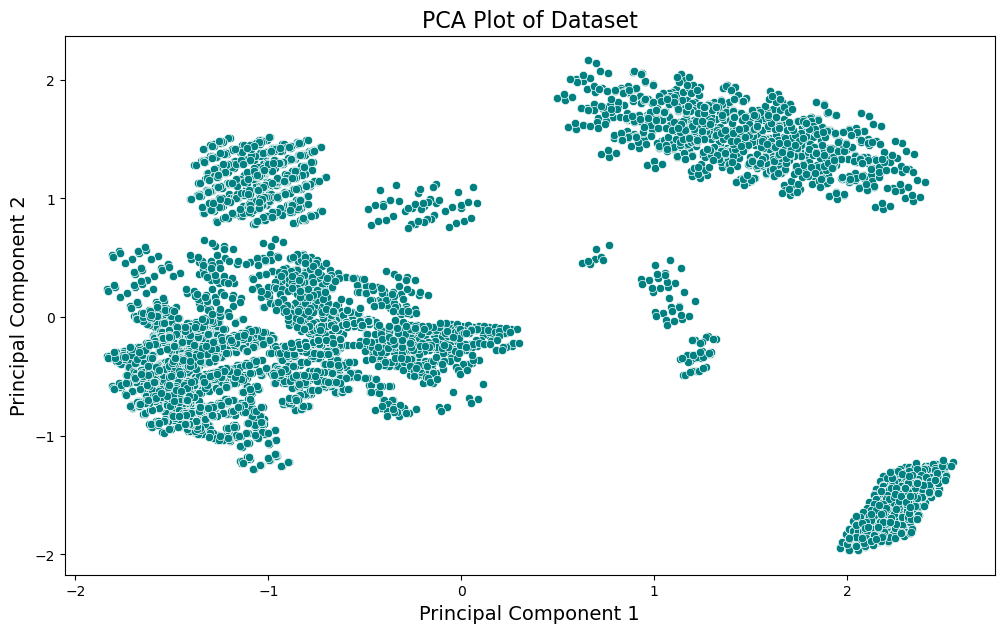

In [38]:
# After we have reduced the dataset's dimensions based on the PCA results we will visualize
# the data in the reduced dimension space.

# Firstly create a figure for the scatter plot with specific dimensions
plt.figure(figsize=(12, 7))

# Create a scatter plot using Seaborn to visualize the first and second principal components
sns.scatterplot(x=df_encoded_pca[:, 0], y=df_encoded_pca[:, 1], color='teal')

# Add title and axis labels to the plot
plt.title('PCA Plot of Dataset', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

# Show the plot
plt.show()

## Clustering the data
With our data now condensed into two dimensions, we can proceed to apply K-Means clustering. To ascertain the optimal number of clusters for this task, we will utilize an elbow plot.

The elbow plot illustrates the sum of squared distances between each data point and its nearest cluster center. The objective is to identify the number of clusters at which the reduction in this sum of squared distances becomes notably significant.

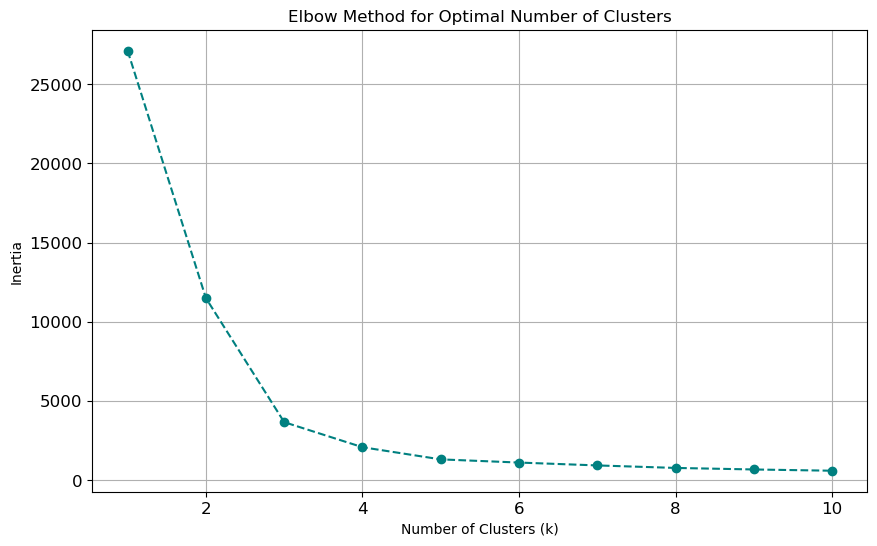

In [39]:
# Initialize variables
clusters = []
k_range = range(1, 11)  # We will check for up to 10 clusters

# Run K-means with different k values and store the inertia (sum of squared distances)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_encoded_pca)
    clusters.append(kmeans.inertia_)

# Plot the Elbow method graph (sum of squared distances for each 'k')
# Firstly create a figure for the scatter plot with specific dimensions
plt.figure(figsize=(10, 6))

# Create the elbow plot
plt.plot(k_range, clusters, marker='o', linestyle='--', color='teal')

# Add title and axis labels to the plot
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Set font sizes for x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines along the y-axis for better readability
plt.grid(True)

# Display the plot
plt.show()

In [40]:
# First we must specify the number of clusters (in this case, 3 clusters based on the elbow method)
n_cluster = 3

# Initialize KMeans with the specified number of clusters and set a random seed for reproducibility
kmeans = KMeans(n_clusters=n_cluster, random_state=0)

# Fit the KMeans model and predict cluster labels for the data transformed by PCA
cluster = kmeans.fit_predict(df_encoded_pca)

# Create a copy of the original DataFrame to hold the cluster labels
df_kmeans = df.copy()

# Assign the predicted cluster labels to a new column called 'labels'
df_kmeans['cluster'] = cluster

# Display the first few rows of the DataFrame with cluster labels
df_kmeans

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,cluster
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,close,black,...,smooth,white,white,white,one,pendant,black,scattered,urban,1
1,edible,convex,smooth,yellow,bruises,almond,free,close,close,black,...,smooth,white,white,white,one,pendant,brown,numerous,grasses,1
2,edible,bell,smooth,white,bruises,anise,free,close,close,brown,...,smooth,white,white,white,one,pendant,brown,numerous,meadows,1
3,poisonous,convex,scaly,white,bruises,pungent,free,close,close,brown,...,smooth,white,white,white,one,pendant,black,scattered,urban,1
4,edible,convex,smooth,gray,no,none,free,crowded,crowded,black,...,smooth,white,white,white,one,evanescent,brown,abundant,grasses,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,close,yellow,...,smooth,orange,orange,orange,one,pendant,buff,clustered,leaves,1
8120,edible,convex,smooth,brown,no,none,attached,close,close,yellow,...,smooth,orange,orange,brown,one,pendant,buff,several,leaves,1
8121,edible,flat,smooth,brown,no,none,attached,close,close,brown,...,smooth,orange,orange,orange,one,pendant,buff,clustered,leaves,1
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,close,buff,...,silky,white,white,white,one,evanescent,white,several,leaves,2


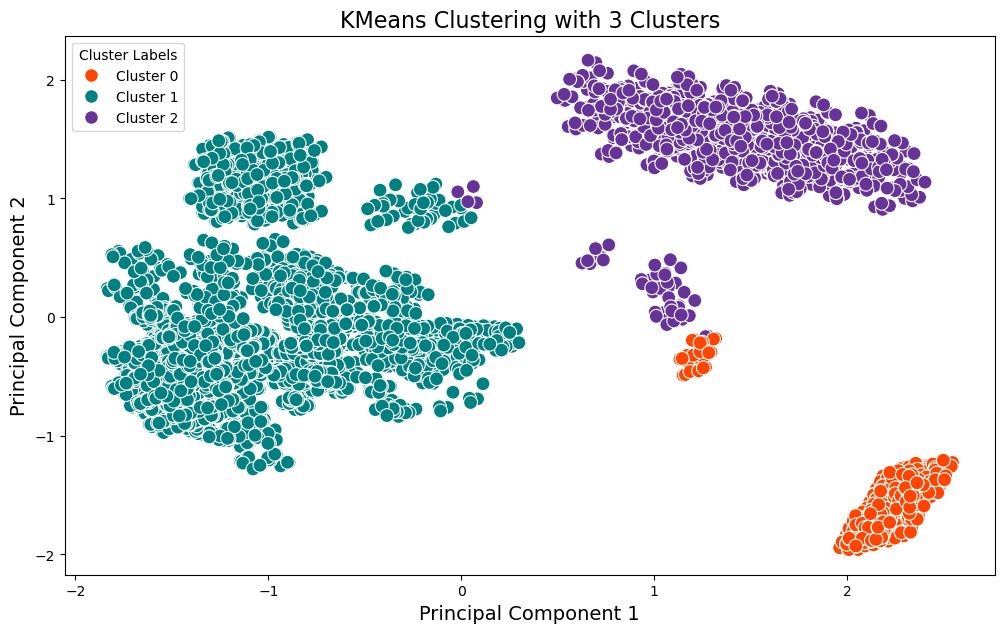

In [41]:
# Define the colors and labels for the clusters
colors = ['orangered', 'teal', 'rebeccapurple']
label = ['Cluster 0', 'Cluster 1', 'Cluster 2']

# Create a figure for the scatter plot with specific dimensions
plt.figure(figsize=(12, 7))

# Create a scatter plot using Seaborn to visualize the clustered data points
# - 'hue': Colors the points based on cluster labels
# - 'palette': Sets the color palette based on the defined 'colors'
# - 's': Sets the size of the data points to 100
sns.scatterplot(x=df_encoded_pca[:,0], y=df_encoded_pca[:,1], hue=df_kmeans['cluster'], palette=colors, s=100)

# Add title and axis labels to the plot
plt.title('KMeans Clustering with 3 Clusters', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

# Create a custom legend based on the specified colors and labels
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(colors, label)]

# Place the legend in the upper left corner.
plt.legend(handles=custom_legend, title='Cluster Labels', loc=2)

# Display the plot
plt.show()

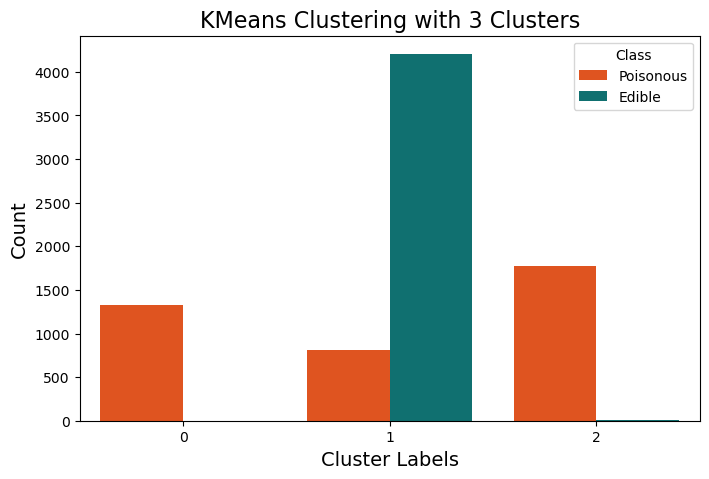

In [42]:
# Define a custom color palette with 'orangered' for Poisonous and 'teal' for Edible
color_palette = {'poisonous': 'orangered', 'edible': 'teal'}

# Create a figure for the scatter plot with specific dimensions
plt.figure(figsize=(8, 5))

# Use the custom color palette and set hue to 'class'
sns.countplot(x=df_kmeans['cluster'], hue=df_kmeans['class'], palette=color_palette)

# Add title and axis labels to the plot
plt.title('KMeans Clustering with 3 Clusters', fontsize=16)
plt.xlabel('Cluster Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add a legend with custom labels
plt.legend(title='Class', labels=['Poisonous', 'Edible'])

# Display the plot
plt.show()

As we can see, there is an almost correct clustering of the mushrooms, with all the poisonous ones placed in cluster number 0.

# SML: Fitting, testing and evaluating the model

This step encompasses several essential tasks aimed at building and assessing the performance of a SML predictive model. This step typically follows data preprocessing and feature engineering and precedes model deployment. Here is a detailed description of this step:

1.   **Data Splitting:** The first task is to divide the available dataset into at least two subsets: a training set and a testing (or validation) set. The training set is used to teach the model patterns in the data, while the testing set is reserved for evaluating its performance on unseen data. In more advanced setups, you might also have a validation set for hyperparameter tuning.

2.   **Model Selection:** Choose an appropriate machine learning algorithm or model architecture that is well-suited to the problem at hand. This choice depends on factors such as the nature of the data (e.g., classification, regression), the size of the dataset, and the specific objectives of the project.
3.   **Model Training (Fitting):** With the training data in hand, the selected model is trained on this dataset. During training, the model learns to make predictions by adjusting its internal parameters to minimize the difference between its predictions and the actual target values. This is typically done through optimization techniques like gradient descent.
4.   **Hyperparameter Tuning:** Fine-tune the model's hyperparameters, which are settings that affect the model's learning process but are not learned from the data itself. Grid search, random search, or more advanced techniques like Bayesian optimization can be used to find the best hyperparameters for your model.
5.   **Model Testing:** After training, the model is evaluated on the testing (or validation) dataset. The goal here is to assess how well the model generalizes to new, unseen data. Common evaluation metrics depend on the problem type and can include accuracy, precision, recall, F1-score.

In [43]:
# As it is meantioned in the above description, we must split the data into training and testing sets
# X is your feature matrix, y is your target variable
# test_size specifies the proportion of data to be used for testing (20% in this case)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6499, 20), (1625, 20), (6499,), (1625,))

In [44]:
# Let's use an advanded classifier algorithm.
# This is XGBClassifier, RandomForestClassifier, KNeighborsClassifier and DecisionTreeClassifier
# Based on the result of these different classifiers we will pick one model and go through with this one model

In [45]:
# First we make a instance of XGBClassifier
# And then we train the XGBClassifier model on the training data by fitting the model to the train data
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_xgb_pred = model_xgb.predict(X_train)

In [46]:
# We are doing the same for the other models as for the XGBClassifier
# Her we train the RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_rf_pred = model_rf.predict(X_train)

In [47]:
# KNeighborsClassifier
model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)
y_kn_pred = model_kn.predict(X_train)

In [48]:
# DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_dt_pred = model_dt.predict(X_train)

In [49]:
# Print the training scores for each model
print('Model xgb' + ' ' + str(model_xgb.score(X_train, y_train)))
print('Model rf' + ' ' + str(model_rf.score(X_train, y_train)))
print('Model kn' + ' ' + str(model_kn.score(X_train, y_train)))
print('Model dt' + ' ' + str(model_dt.score(X_train, y_train)))

Model xgb 1.0
Model rf 1.0
Model kn 1.0
Model dt 1.0


## Chose our model
The choice of classifier depends on the specific problem, the nature of the dataset, and the trade-offs you are willing to make between accuracy, interpretability, and computational efficiency. XGBClassifier and RandomForestClassifier are often favored for their high predictive power, while KNeighborsClassifier and DecisionTreeClassifier are simpler and more interpretable but may require careful parameter tuning and handling of certain data characteristics.

We chose model XGBClassifier as our model since it is extremely powerful and accurate ensemble learning method and it automatically supports regularization to prevent overfitting.


In [50]:
# Our chosen model
model = model_xgb
y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)

**Classification report**
*  *Precision (also called Positive Predictive Value)*: Precision measures how many of the predicted positive instances for a class were actually correct. TP/(TP+FP)
*  *Recall (also called True Positive Rate or Sensitivity)*: Recall measures how many of the actual positive instances for a class were correctly predicted. TP/(TP+FN)
*  *F1-Score:* The F1-Score is the harmonic mean of precision and recall and provides a single metric that balances both precision and recall. 2⋅(Precision⋅Recall)/(Precision+Recall)
*  *Support:* Support is the number of actual instances of each class in the dataset. It gives you an idea of how many instances belong to each class.
*  *Accuracy:* This is the overall accuracy of the classification model, calculated as the ratio of correctly predicted instances to the total number of instances. (TP+TN)/(TP+TN+FP+FN)
*  *Macro Avg (Macro Average):* This is the average of the precision, recall, and F1-score across all classes, giving equal weight to each class.
*  *Weighted Avg (Weighted Average):* This is the weighted average of precision, recall, and F1-score, where the weights are determined by the number of instances in each class. It provides a measure of overall model performance while taking class imbalances into account.

In [51]:
# Generate a classification report for the training data

# Inverse transform the encoded training labels back to their original class names
true_class_train = labelencoder_y.inverse_transform(y_train)

# Make predictions on the training data using the chosen model and then inverse transform the predictions
predicted_class_train = labelencoder_y.inverse_transform(model.predict(X_train))

# This report includes metrics such as precision, recall, F1-score, and support for each class
# 'labels' parameter specifies the order of classes in the report, using labelencoder_y's classes
# This can be useful for ensuring consistent order in the report, especially for multi-class problems
print(classification_report(true_class_train,predicted_class_train, labels=labelencoder_y.classes_))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      3386
   poisonous       1.00      1.00      1.00      3113

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499



**Confusion matrix** <br>
A confusion matrix is a fundamental tool for evaluating the performance of a classification model. It provides a clear and detailed summary of the model's predictions and their agreement with the actual outcomes. A confusion matrix is particularly useful when dealing with binary classification problems, but it can also be adapted for multi-class classification.

*  *True Positives (TP):* These are instances that were correctly predicted as positive by the model. In binary classification, "positive" typically refers to the class of interest or the one you want to detect.
*  *True Negatives (TN):* These are instances that were correctly predicted as negative by the model. In binary classification, "negative" typically refers to the class other than the one of interest.
*  *False Positives (FP):* These are instances that were incorrectly predicted as positive when they were actually negative. False positives are also known as Type I errors.
*  *False Negatives (FN):* These are instances that were incorrectly predicted as negative when they were actually positive. False negatives are also known as Type II errors.

In summary, a confusion matrix provides a detailed breakdown of a model's performance, allowing you to understand how it is making correct and incorrect predictions.

In [52]:
# Generate a cross-tabulation (crosstab) between the true and predicted classes

# Create a DataFrame to compare true and predicted classes on the training data
crosstab_train = pd.DataFrame({'true_class': true_class_train, 'predicted_class': predicted_class_train})

# This creates a table that shows the counts of each combination of true and predicted classes
# Useful for understanding how well the model is classifying instances into different classes
pd.crosstab(crosstab_train.true_class, crosstab_train.predicted_class)

predicted_class,edible,poisonous
true_class,,
edible,3386,0
poisonous,0,3113


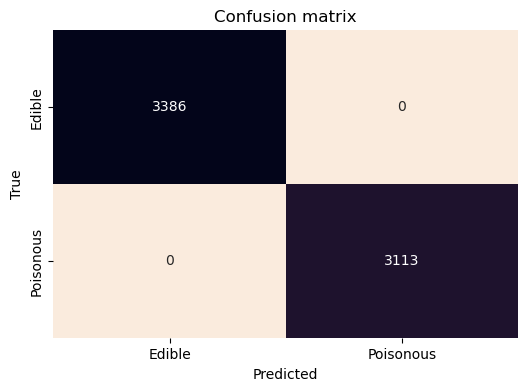

In [53]:
# The cross tab matrix above is actually just a confusion_matrix in a tabula form.
# For creating the confusion_matrix in a more visual way we need to start by creating instance for confusion_matrix:
conf_matrix = confusion_matrix(y_train,y_pred_train)

# After that we will create a heatmap.
# First we will set the figsize
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rocket_r', cbar=False)

# Setting the title and label indication for the plot
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Set x-axis and y-axis labels
plt.xticks([0.5, 1.5], ['Edible', 'Poisonous'])
plt.yticks([0.5, 1.5], ['Edible', 'Poisonous'])

# Display the visual
plt.show()


As we can see from the confusion_matrix is that out of 6.499 (train data), 3.347 predictions are correct(TP) as well as 3.152 predictions are correct(TN). This means that 3.347 are edible and 3.152 are poisonous in our test data

We can also see that there are no FP (False Positive) or FN (False Negative), means or selected modelpredicted all predictions as same like our y_test (actual)

**ROC Curve and AUC (ROC: Receiver Operating Characteristic Curve and AUC: Area Under the Curve)**

Calculating ROC Curve and AUC is a method used to assess the performance of binary classification models, particularly in machine learning and statistics.

In summary, the ROC curve and AUC are tools for evaluating the performance of binary classification models by assessing their ability to discriminate between positive and negative cases across different threshold settings. A higher AUC suggests better model performance, and the ROC curve visually illustrates this performance trade-off.


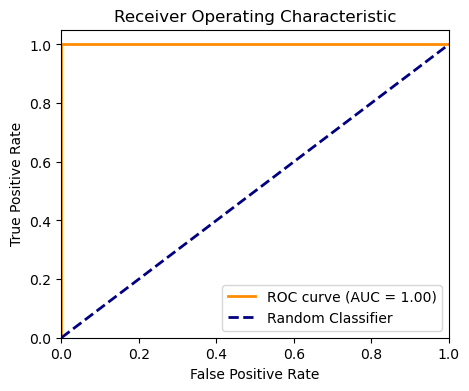

In [54]:
# Calculate the ROC curve using the true labels
# and predicted probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test,model.predict_proba(X_test)[:,1])

# Calculate the Area Under the ROC Curve (AUC) based on the ROC curve
roc_auc = auc(fpr, tpr)

# To plot roc curve we will start with setting the specific size for the plot
plt.figure(figsize=(5,4))

# Plot the ROC curve with the lable (both ROC with AUC value and random classifier)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

# Set the limits for both axis
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Set the title and labels for both axis
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#Place the legend in the lower right corner
plt.legend(loc="lower right")

#Display the plot
plt.show()

## Hyperparameter tuning using GridSearchCV

Hyperparameters is the process of finding the optimal set of hyperparameters for a machine learning model. Hyperparameters are configuration settings that are not learned from the training data but are set before the training process begins. They control various aspects of the training process and significantly impact a model's performance, generalization ability, and computational efficiency. These parameters are external to the model and must be specified by the practitioner.

In [55]:
# We have chosen to go with the RandomForrest classifier, and here we are trying to fine tune the parameters
parameters_xgb = {
    'n_estimators': [100, 200], # This parameter defines the number of boosting rounds or trees in the ensemble
    'learning_rate': [0.1, 0.3], # The learning rate controls the step size during the optimization process
    'max_depth': [4, 6], # This parameter sets the maximum depth of each tree in the ensemble
    'subsample': [0.8, 1.0], # Subsample represents the fraction of observations that are randomly sampled to grow trees
    'colsample_bytree': [0.8, 1.0], # This parameter represents the fraction of features that are randomly sampled for each tree
}

In [56]:
# Initiate score
scorer = make_scorer(accuracy_score)

# Performing hyperparameter tuning using grid search for xgb classifier with parameter grid and socring metric
grid_obj = GridSearchCV(model_xgb, parameters_xgb, scoring=scorer)

In [57]:
# Fitting the input data X and y
grid_fit = grid_obj.fit(X, y)

In [58]:
# Get the estimator
best_model = grid_fit.best_estimator_

# Fit the new best model.
best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [59]:
# Print the best hyperparameters
print("Best Hyperparameters: ", grid_fit.best_params_)

Best Hyperparameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 200, 'subsample': 1.0}


In [60]:
# Model performance on train data
# Here we can see a perfect score which indicates that we might have a overfitting model
best_model.score(X_train, y_train)

1.0

The result 100% on the train data, represents the accuracy of the best-tuned model on the test set. In a classification context, accuracy is the ratio of correctly predicted instances to the total instances in the dataset.

## Final evaluation

In [61]:
# Now we have our test data as our imput
best_model.score(X_test, y_test)

1.0

In [62]:
# Generate a classification report for the training data
true_class_test = labelencoder_y.inverse_transform(y_test)
predicted_class_test = labelencoder_y.inverse_transform(best_model.predict(X_test))
print(classification_report(true_class_test,predicted_class_test, labels=labelencoder_y.classes_))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       822
   poisonous       1.00      1.00      1.00       803

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [63]:
# Generate a cross-tabulation (crosstab) between the true and predicted classes
crosstab_test = pd.DataFrame({'true_class': true_class_test, 'predicted_class': predicted_class_test})
pd.crosstab(crosstab_test.true_class, crosstab_test.predicted_class)

predicted_class,edible,poisonous
true_class,,
edible,822,0
poisonous,0,803


In [64]:
# Generate a cross-tabulation (crosstab) in a normalize manner
crosstab_test = pd.DataFrame({'true_class': true_class_test, 'predicted_class': predicted_class_test})
pd.crosstab(crosstab_test.true_class, crosstab_test.predicted_class,normalize='index') * 100

predicted_class,edible,poisonous
true_class,,
edible,100.0,0.0
poisonous,0.0,100.0


The classification report states that the precision, recall and the F1-score for our test data where it indicates a perfect 1.0 score for all the parameters for y test.

The precision states the true positives prediction divided by the sum of true positives and false positives. As the prediction states that there’s no false positives.

Recall is the true positive prediction divided by the sum of true positives and false negatives. It indicates that there are no false negatives.

F1 score is the average of precision and recall. Where it takes into account for both false positives and false negatives. The score indicates a prefect between precision and recall.

The XGBClassifier model indicates to be a well performing model. However, it is important to consider the context and the features of the dataset. As this could mean that the model is overfitting the test data. As there could be imbalances in the dataset. Considering that y is either edible or poisonous, where the data read that it’s almost a 50 to 50 ratio for who is edible or not.


## SHAP (SHapley Additive exPlanations)

SHAP analysis, short for SHapley Additive exPlanations, is a potent and widely adopted technique within the realms of machine learning and explainable artificial intelligence (XAI). Its primary purpose is to furnish a deeper understanding of how the input features of a machine learning model influence its predictions. SHAP values, a central component of this method, elucidate the enigmatic predictions of complex models by ascribing each prediction's outcome to individual features.

In essence, SHAP analysis in Statistical Machine Learning (SML) serves as a methodology for elucidating machine learning model outputs by assigning accountability to individual features. This plays a pivotal role in enhancing the transparency, interpretability, and credibility of machine learning models.

In [65]:
# Define the explainer we are using the best model from the hyperparameter tuning which is from the XGBClassifier model
explainer = shap.TreeExplainer(best_model)

In [66]:
# Define explainer for test and train model
shap_values = explainer.shap_values(X)

**SHAP summary_plot**

`shap.summary_plot` overview of the feature importance and the impact of individual features on model predictions.

It's very useful when working with machine learning models, where understanding feature importance is essential. Here's what a shap.summary_plot typically shows:

*  *Feature Importance Bar Plot:* At the top of the plot, you'll see a bar plot showing the importance of each feature. The features are listed on the y-axis, and the x-axis represents the feature importance values. Features with higher importance are displayed at the top, while less important features are lower in the plot. This gives you an overall view of which features contribute the most to the model's predictions.
*  *Color Coding:* The dots in the scatter plots are often color-coded. This coloring can represent the value of another feature. It helps you see how the relationship between the featured feature and its impact on predictions may depend on the value of another feature.

In summary, shap.summary_plot provides a compact and informative visualization of feature importance and feature impact on model predictions. It helps you identify which features are most influential, how they affect predictions, and whether their impact varies depending on the value of other features. This tool is valuable for model interpretation, debugging, and understanding the relationships between features and model outputs.

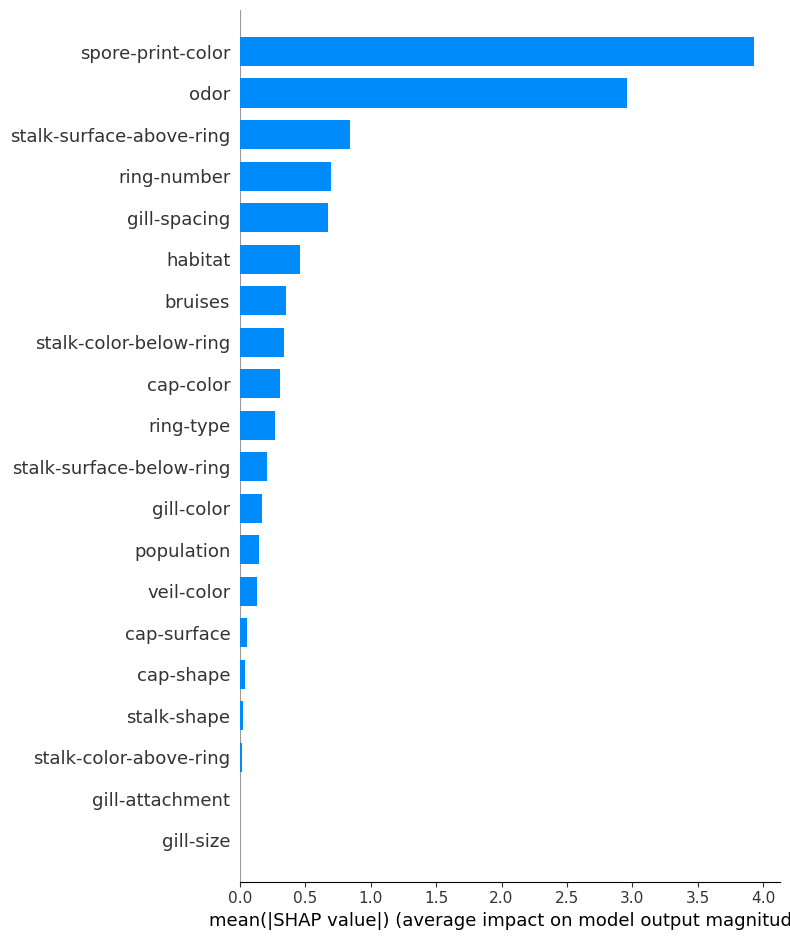

In [67]:
# Plotting the summary plot provides an overview of the feature importances based on SHAP values for the X data
shap.summary_plot(shap_values, X, plot_type="bar")

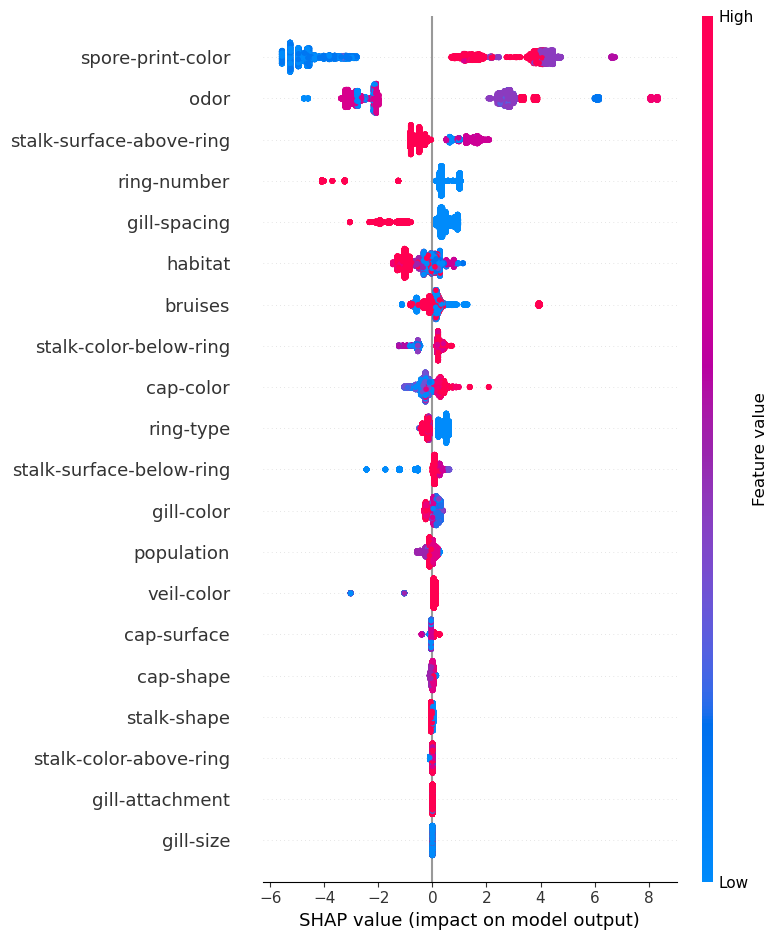

In [68]:
shap.summary_plot(shap_values, X)

### Feature Selection Based on SHAP Analysis

Before this section, we have allready analyzed the SHAP plot to determine the impact of individual features on the model's output.

By assessing the feature contributions, we identify features that have minimal influence on predictions and decide to remove them. The selected features for our model does not include:

*   cap-shape
*   stalk-color-above-ring
*   cap-surface
*   gill-attachment
*   gill-size

In [69]:
# Here we select our features in our model and define it as X2, and so we remove the features
X2 = X[['cap-color','bruises','odor','gill-spacing','gill-color','stalk-shape','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-below-ring','veil-color','ring-number','ring-type','spore-print-color','population','habitat']]

In [70]:
# We now do the same steps as before but now with our new dataframe
# we do not chnage the y since we did not chnage something on our target feature class

In [71]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)

In [72]:
# Fitting the input data X and y
grid_fit = grid_obj.fit(X2, y)

In [73]:
# Get the estimator.
best_model = grid_fit.best_estimator_

# Fit the new model.
best_model.fit(X2_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [74]:
# Printing the training score for the model
print('Best Model' + ' ' + str(best_model.score(X2_train, y_train)))

Best Model 1.0


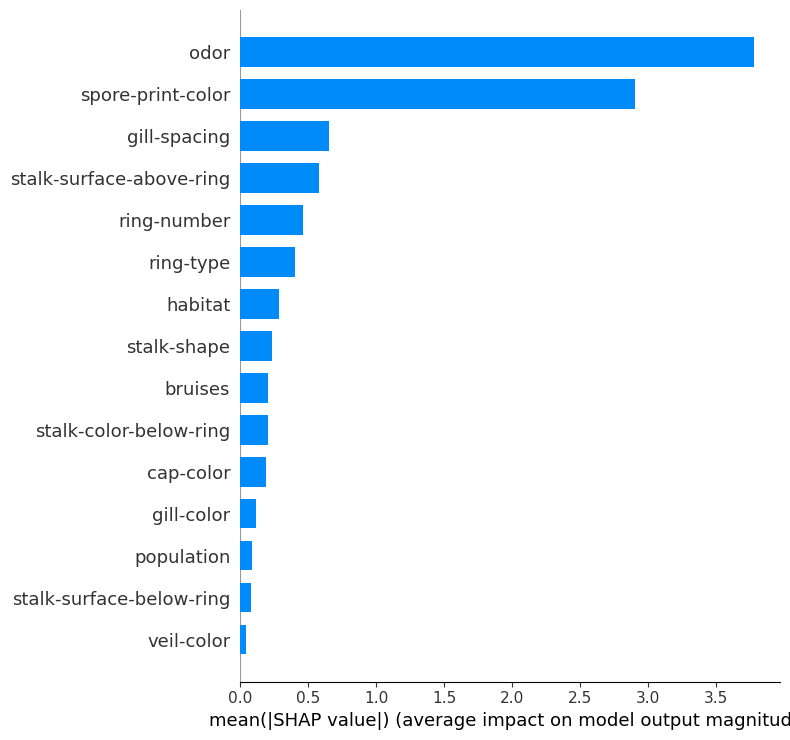

In [75]:
# Defining the explainer, still using the best model from the hyperparameter tuning which is the XGBClassifier model
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X2)

# Plotting the summary plot provides an overview of the feature importances based on SHAP values for the X2 data
shap.summary_plot(shap_values, X2, plot_type="bar")

As we can see in the above summary_plot the features we have droped is now excluded from the X2. We will therefore continue with this X2 as our feature selection.

# Creating the data pipeline the the SML part

The task of creating a data pipeline for Statistical Machine Learning (SML) involves a series of meticulously planned steps designed to ensure that the data used for training and evaluation is of high quality, appropriately processed, and ready for the machine learning algorithms. These steps include data collection, cleaning, feature engineering, data splitting, normalization, categorical encoding, and more. Each element of the pipeline is carefully constructed to cater to the specific needs of the problem at hand.

The objective of this data pipeline is to provide a robust and standardized framework that streamlines the entire machine learning workflow. By adhering to best practices in data preprocessing and transformation, the data pipeline sets the stage for building accurate and interpretable machine learning models. It also facilitates the development of trustworthy models that can be deployed in real-world applications.

In this section, we will delve into the intricacies of creating the data pipeline for SML. We will explore the various steps involved, discuss the significance of each step, and highlight the critical role it plays in the overall success of the machine learning project. Through effective data pipeline creation, we pave the way for harnessing the full potential of statistical machine learning and making data-driven decisions with confidence.

In [76]:
# Defining the pipeline
pipeline = Pipeline([
    ('model', XGBClassifier()) # Classification model
  ])

# Fit the pipeline on the training data
pipeline.fit(X2_train, y_train)

# Print the test score of the pipeline on the test set
print("Test score: {:.2f}".format(pipeline.score(X2_test, y_test)))

Test score: 1.00


The test score of 1.00 indicates perfect accuracy on the test set. In classification tasks, accuracy is a common evaluation metric, and it measures the ratio of correctly predicted instances to the total number of instances.

This could mean that the model might be overfitted as the model may not generalize well to new and unseen data.

The dataset might have features that are imbalanced which could interfere with the accuracy

In [77]:
# Perform cross-validation on the pipeline
scores = cross_val_score(pipeline, X2, y)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.84246154 1.         1.         1.         0.70935961]
Average cross-validation score: 0.91


In [78]:
# Print the pipeline steps
pipeline_short = make_pipeline(XGBClassifier())
print("Pipeline steps:\n{}".format(pipeline_short.steps))

Pipeline steps:
[('xgbclassifier', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...))]


## Test the pipeline with a SML prediction

After we have constructing a data pipeline for our model, the next pivotal step is to put it to the test. This involves applying the carefully designed pipeline to real-world data and making predictions using a Statistical Machine Learning (SML) model. Testing the pipeline allows you to assess the pipeline's effectiveness, model performance, and its ability to generate meaningful insights from the data.

In [79]:
# Defining new dataframe
new_df_num = pd.DataFrame({
    'cap-color': 0,
    'bruises': 0,
    'odor': 7,
    'gill-spacing': 0,
    'gill-color': 0,
    'stalk-shape': 0,
    'stalk-surface-above-ring': 3,
    'stalk-surface-below-ring': 3,
    'stalk-color-below-ring': 7,
    'veil-color': 2,
    'ring-number': 1,
    'ring-type': 4,
    'spore-print-color': 0,
    'population': 3,
    'habitat': 4

}, index = [0])

new_values_num = pd.DataFrame(new_df_num, columns = new_df_num.columns, index=[0])

In [80]:
# Setting new data to our line_to_predict
line_to_pred = new_values_num
line_to_pred

,cap-color,bruises,odor,gill-spacing,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,7,0,0,0,3,3,7,2,1,4,0,3,4


In [81]:
# Predict our line
best_model.predict(line_to_pred)[0]

1

In [82]:
# Defining our mushroom_prediction function
def mushroom_prediction(cap_color=0, bruises=0, odor=7, gill_spacing=0, gill_color=0, stalk_shape=0, stalk_surface_above_ring=3, stalk_surface_below_ring=3, stalk_color_below_ring=7, veil_color=2, ring_number=1, ring_type=4, spore_print_color=0, population=3, habitat=4): #parameter = default_value

  new_df_num = pd.DataFrame({
      'cap-color': [cap_color],
      'bruises': [bruises],
      'odor': [odor],
      'gill-spacing': [gill_spacing],
      'gill-color': [gill_color],
      'stalk-shape': [stalk_shape],
      'stalk-surface-above-ring': [stalk_surface_above_ring],
      'stalk-surface-below-ring': [stalk_surface_below_ring],
      'stalk-color-below-ring': [stalk_color_below_ring],
      'veil-color': [veil_color],
      'ring-number': [ring_number],
      'ring-type': [ring_type],
      'spore-print-color': [spore_print_color],
      'population': [population],
      'habitat': [habitat]
  })

  new_values_num = pd.DataFrame(new_df_num, columns = new_df_num.columns, index=[0])
  line_to_pred = new_values_num

  prediction = best_model.predict(line_to_pred)
  return prediction[0]

In [83]:
# Testing our function with default values
mushroom_prediction()

1

In [84]:
# Testing our function on various rows
print(mushroom_prediction(0, 0, 7, 0, 0, 0, 3, 3, 7, 2, 1, 4, 0, 3, 4))
print(mushroom_prediction(9, 0, 0, 0, 0, 0, 3, 3, 7, 2, 1, 4, 1, 2, 0))
print(mushroom_prediction(9, 0, 0, 0, 0, 0, 3, 3, 7, 2, 1, 4, 1, 2, 0))

1
0
0


# Create an interface to interact with our UML model

In [85]:
# We just use are code from before on X2 to visualize the encoded vs. orriginal labels
# to have an understanding of them in the interface.

# To see the the labelencoding for all values, we will make the below loop for going though all the
# original values vs the encoded values

# Here we print the categories/columns in each feature X
column_list = X2.columns.values.tolist()

# This is a loop which will loop through each column name in the list 'column_list'.
# 'column_list' is defined above as the column names therefore a list of all features
for column_name in column_list:

    # Print the column name with bold formatting
    print(f'\033[1m{column_name}\033[0m')

    # Print the unique values in the original 'column_name'
    print(df[column_name].unique())

    # Convert the unique values in the X['column_name'] to a list of strings
    print(list(map(str,X2[column_name].unique())))

    # Make a new line be printing a newline character for better separation of column outputs
    print('\n')

cap-color
['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green']
['0', '9', '8', '3', '7', '5', '1', '6', '2', '4']


bruises
['bruises' 'no']
['0', '1']


odor
['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty']
['7', '0', '1', '6', '4', '2', '3', '8', '5']


gill-spacing
['close' 'crowded']
['0', '1']


gill-color
['black' 'brown' 'gray' 'pink' 'white' 'chocolate' 'purple' 'red' 'buff'
 'green' 'yellow' 'orange']
['0', '1', '4', '7', '10', '3', '8', '9', '2', '5', '11', '6']


stalk-shape
['enlarging' 'tapering']
['0', '1']


stalk-surface-above-ring
['smooth' 'fibrous' 'silky' 'scaly']
['3', '0', '2', '1']


stalk-surface-below-ring
['smooth' 'fibrous' 'scaly' 'silky']
['3', '0', '1', '2']


stalk-color-below-ring
['white' 'pink' 'gray' 'buff' 'brown' 'red' 'yellow' 'orange' 'cinnamon']
['7', '5', '3', '1', '0', '6', '8', '4', '2']


veil-color
['white' 'brown' 'orange' 'yellow']
['2', '0', '1', '3']


ring-number
['one' 'two' '

In [86]:
# Create a Gradio interface
iface = gr.Interface(
    fn=mushroom_prediction,
    inputs=[
                      gr.Dropdown(X2['cap-color'].unique().tolist(), label="cap-color"),
                      gr.Dropdown(X2['bruises'].unique().tolist(), label="bruises"),
                      gr.Dropdown(X2['odor'].unique().tolist(), label="odor"),
                      gr.Dropdown(X2['gill-spacing'].unique().tolist(), label="gill-spacing"),
                      gr.Dropdown(X2['gill-color'].unique().tolist(), label="gill-color"),
                      gr.Dropdown(X2['stalk-shape'].unique().tolist(), label="stalk-shape"),
                      gr.Dropdown(X2['stalk-surface-above-ring'].unique().tolist(), label="stalk-surface-above-ring"),
                      gr.Dropdown(X2['stalk-surface-below-ring'].unique().tolist(), label="stalk-surface-below-ring"),
                      gr.Dropdown(X2['stalk-color-below-ring'].unique().tolist(), label="stalk-color-below-ring"),
                      gr.Dropdown(X2['veil-color'].unique().tolist(), label="veil-color"),
                      gr.Dropdown(X2['ring-number'].unique().tolist(), label="ring-number"),
                      gr.Dropdown(X2['ring-type'].unique().tolist(), label="ring-type"),
                      gr.Dropdown(X2['spore-print-color'].unique().tolist(), label="spore-print-color"),
                      gr.Dropdown(X2['population'].unique().tolist(), label="population"),
                      gr.Dropdown(X2['habitat'].unique().tolist(), label="habitat"),
                     ],
    outputs="text",
    live=True,
    title="Mushroom Predictor",
    description="Predict if mushroom is edible or not based on input features."
  )

# Launch the Gradio app
iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://6b4d56b45ff5bff46b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Saving the model for an interface using pickle

Saving machine learning models is a critical step in deploying them for practical applications. One common method for preserving the state of a trained model is by using the Python library "pickle." Here we will explore the process of saving a machine learning model using pickle, which enables us to serialize the model's parameters and structure into a file. This serialized model can then be  loaded and utilized within another python file, without the need for retraining.

In [87]:
# First we want to save to the original dataframe
df.to_json('df.json')

In [88]:
# We also want to save the labelencoder_X
pickle.dump(labelencoder_X, open('labelencoder.pkl','wb'))

In [89]:
# We save the 'X2' feature dataframe. X2 is the featurelist after we have droped some columns
# based on our SHAP analysis
X2.to_json('X2.json')

In [90]:
# We must save best_model as it is the model we want to make our predictions on
pickle.dump(best_model, open('Best_model.pkl','wb'))
best_model.save_model('Best_model.json')